# Loan Default Risk Analysis - EDA Project


## Introduction
This assignment aims to give you an idea of applying EDA in a real business scenario. In this assignment, apart from applying the techniques that you have learnt in the EDA module, you will also develop a basic understanding of risk analytics in banking and financial services and understand how data is used to minimise the risk of losing money while lending to customers.

**Business Context:** 
Loan-providing companies face challenges in lending to people with insufficient or non-existent credit history. Some consumers exploit this by defaulting on loans, causing financial losses.

**Objective:** 
Use Exploratory Data Analysis (EDA) to identify patterns and factors that indicate whether a client will have difficulty repaying a loan.

**Dataset:**
- `application_data.csv` - Current loan application data (307,511 records)
- `previous_application.csv` - Previous loan history
- `columns_description.csv` - Data dictionary

**Target Variable:**
- **0** = No payment difficulties (Client paid on time)
- **1** = Payment difficulties (Late payment > X days)

**Analysis Approach:**
1. Data Understanding & Quality Assessment
2. Missing Values & Outlier Analysis
3. Data Imbalance Analysis
4. Univariate Analysis (Individual variables)
5. Bivariate Analysis (Variable relationships)
6. Segmented Analysis (Combined patterns)
7. Top 10 Correlations by Segment
8. Business Insights & Recommendations  

---


# Section 1- Setup

## 1. Import Required Libraries

**Libraries Used:**
- **pandas**: Data manipulation
- **numpy**: Numerical operations
- **matplotlib**: Visualizations
- **seaborn**: Statistical plots


In [18]:
# use this cell to import all the required packages and methods
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import csv
import os
folder_path = r'c:\Users\tanwe\Downloads\EDA Credit Case Study\EDA Credit Case Study'
os.chdir(folder_path)
print(os.getcwd())


c:\Users\tanwe\Downloads\EDA Credit Case Study\EDA Credit Case Study


## 2. Load and Understand Data

Loading the CSV files into pandas DataFrames for analysis.

In [19]:
def load_data(folder_path):
    os.chdir(folder_path)
    
    app_data = pd.read_csv("application_data.csv", encoding='latin1')
    prev_app = pd.read_csv("previous_application.csv", encoding='latin1')
    col_desc = pd.read_csv("columns_description.csv", encoding='latin1')
    
    print("Application Data:", app_data.shape)
    print("Previous App:", prev_app.shape)
    print("Column Description:", col_desc.shape)
    
    return app_data, prev_app, col_desc

# ---- Define path ----
folder_path = r"C:\Users\tanwe\Downloads\EDA Credit Case Study\EDA Credit Case Study"

# ---- Call function ----
app_data, prev_app, col_desc = load_data(folder_path)

Application Data: (307511, 122)
Previous App: (1670214, 37)
Column Description: (160, 5)


## 3. Data Overview

Understanding the structure and content of our data.

In [20]:
# Display first few rows
print("FIRST 5 ROWS:")
print("=" * 80)
display(app_data.head())

FIRST 5 ROWS:


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
# Dataset information
print("DATASET INFORMATION:")
print("=" * 80)
app_data.info()

DATASET INFORMATION:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


TARGET VARIABLE DISTRIBUTION:
Class 0 (No Difficulties): 282,686 (91.93%)
Class 1 (Payment Difficulties): 24,825 (8.07%)


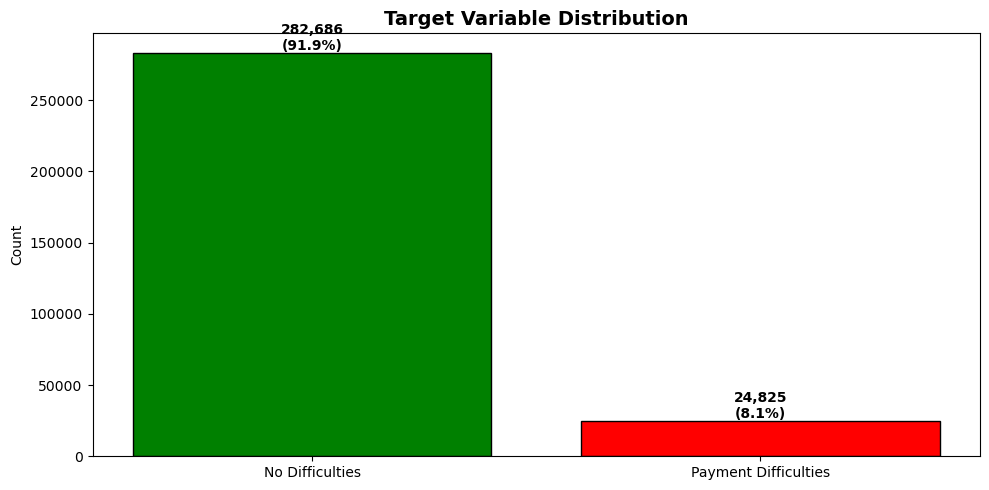

In [22]:
# Target variable distribution
print("TARGET VARIABLE DISTRIBUTION:")
print("=" * 80)

target_counts = app_data['TARGET'].value_counts()
target_percent = app_data['TARGET'].value_counts(normalize=True) * 100

print(f"Class 0 (No Difficulties): {target_counts[0]:,} ({target_percent[0]:.2f}%)")
print(f"Class 1 (Payment Difficulties): {target_counts[1]:,} ({target_percent[1]:.2f}%)")
print("=" * 80)

# Visualize
plt.figure(figsize=(10, 5))
plt.bar(['No Difficulties', 'Payment Difficulties'], target_counts.values, 
        color=['green', 'red'], edgecolor='black')
plt.title('Target Variable Distribution', fontsize=14, fontweight='bold')
plt.ylabel('Count')
for i, v in enumerate(target_counts.values):
    plt.text(i, v, f'{v:,}\n({target_percent.values[i]:.1f}%)', 
             ha='center', va='bottom', fontweight='bold')
plt.tight_layout()
plt.show()

## 4. Missing Value Analysis

**Strategy:**
- Drop columns with >50% missing values
- Fill numerical columns with median
- Fill categorical columns with mode

MISSING VALUE ANALYSIS:
Total columns with missing values: 67

Top 20 columns with missing values:
                      Column  Missing_Count  Missing_Percent
76           COMMONAREA_MEDI         214865        69.872297
48            COMMONAREA_AVG         214865        69.872297
62           COMMONAREA_MODE         214865        69.872297
84  NONLIVINGAPARTMENTS_MEDI         213514        69.432963
70  NONLIVINGAPARTMENTS_MODE         213514        69.432963
56   NONLIVINGAPARTMENTS_AVG         213514        69.432963
86        FONDKAPREMONT_MODE         210295        68.386172
68     LIVINGAPARTMENTS_MODE         210199        68.354953
82     LIVINGAPARTMENTS_MEDI         210199        68.354953
54      LIVINGAPARTMENTS_AVG         210199        68.354953
66            FLOORSMIN_MODE         208642        67.848630
80            FLOORSMIN_MEDI         208642        67.848630
52             FLOORSMIN_AVG         208642        67.848630
61          YEARS_BUILD_MODE         204488    

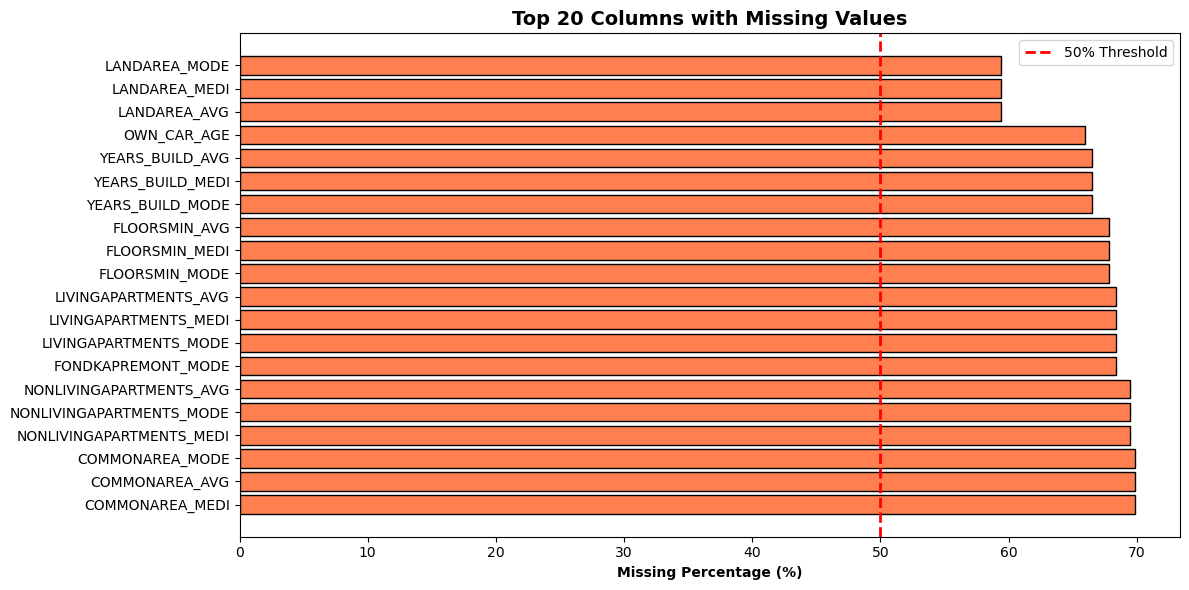

In [23]:
# Calculate missing values
print("MISSING VALUE ANALYSIS:")
print("=" * 80)

missing_data = app_data.isnull().sum()
missing_percent = (missing_data / len(app_data)) * 100

missing_df = pd.DataFrame({
    'Column': missing_data.index,
    'Missing_Count': missing_data.values,
    'Missing_Percent': missing_percent.values
})

missing_df = missing_df[missing_df['Missing_Count'] > 0].sort_values('Missing_Percent', ascending=False)

print(f"Total columns with missing values: {len(missing_df)}")
print("\nTop 20 columns with missing values:")
print(missing_df.head(20))

# Visualize
plt.figure(figsize=(12, 6))
top_20 = missing_df.head(20)
plt.barh(top_20['Column'], top_20['Missing_Percent'], color='coral', edgecolor='black')
plt.xlabel('Missing Percentage (%)', fontweight='bold')
plt.title('Top 20 Columns with Missing Values', fontsize=14, fontweight='bold')
plt.axvline(x=50, color='red', linestyle='--', linewidth=2, label='50% Threshold')
plt.legend()
plt.tight_layout()
plt.show()

In [24]:
# Handle missing values
print("HANDLING MISSING VALUES:")
print("=" * 80)

# Step 1: Drop columns with >50% missing
threshold = 50
cols_to_drop = missing_df[missing_df['Missing_Percent'] > threshold]['Column'].tolist()
print(f"Step 1: Dropping {len(cols_to_drop)} columns with >{threshold}% missing values")

app_data_clean = app_data.drop(columns=cols_to_drop)
print(f" New shape: {app_data_clean.shape}")

# Step 2: Fill numerical columns with median
numerical_cols = app_data_clean.select_dtypes(include=['float64', 'int64']).columns
print(f"\nStep 2: Filling {len(numerical_cols)} numerical columns with MEDIAN")

for col in numerical_cols:
    if app_data_clean[col].isnull().sum() > 0:
        app_data_clean[col].fillna(app_data_clean[col].median(), inplace=True)
print(" Numerical columns handled")

# Step 3: Fill categorical columns with mode
categorical_cols = app_data_clean.select_dtypes(include=['object']).columns
print(f"\nStep 3: Filling {len(categorical_cols)} categorical columns with MODE")

for col in categorical_cols:
    if app_data_clean[col].isnull().sum() > 0:
        app_data_clean[col].fillna(app_data_clean[col].mode()[0], inplace=True)
print("Categorical columns handled")

# Verify
remaining_missing = app_data_clean.isnull().sum().sum()
print(f"\n{'='*80}")
print(f"Total missing values remaining: {remaining_missing}")
print(" All missing values handled successfully!")
print("=" * 80)

HANDLING MISSING VALUES:
Step 1: Dropping 41 columns with >50% missing values
 New shape: (307511, 81)

Step 2: Filling 68 numerical columns with MEDIAN
 Numerical columns handled

Step 3: Filling 13 categorical columns with MODE
Categorical columns handled

Total missing values remaining: 0
 All missing values handled successfully!


## 5. Outlier Detection

Using IQR (Interquartile Range) method to detect outliers in key numerical variables.

**Decision:** We will NOT remove outliers as they represent genuine business cases.

OUTLIER DETECTION RESULTS:
Column                    Outliers     Percentage      Lower Bound        Upper Bound       
AMT_INCOME_TOTAL          14035        4.56           % -22500.00          337500.00         
AMT_CREDIT                6562         2.13           % -537975.00         1616625.00        
AMT_ANNUITY               7504         2.44           % -10584.00          61704.00          
AMT_GOODS_PRICE           14728        4.79           % -423000.00         1341000.00        
DAYS_BIRTH                0            0.00           % -30585.50          -1509.50          
DAYS_EMPLOYED             72217        23.48          % -6466.50           3417.50           


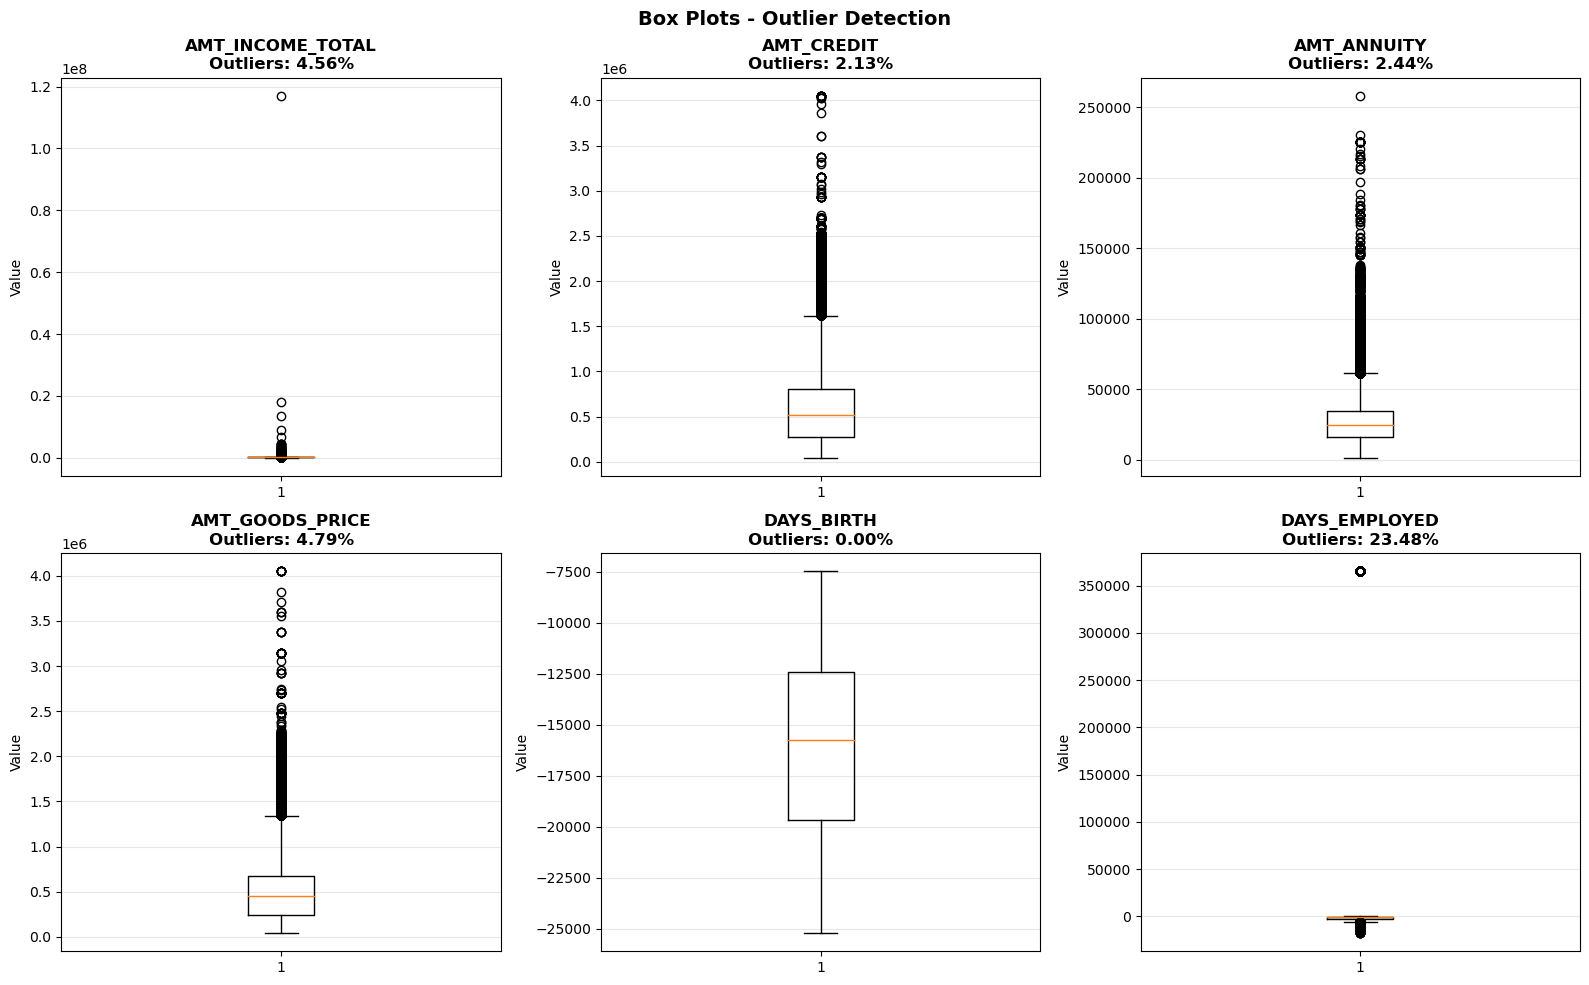

In [25]:
# Function to detect outliers
def detect_outliers(df, columns):
    outlier_summary = {}
    
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outlier_summary[col] = {
            'count': len(outliers),
            'percentage': (len(outliers) / len(df)) * 100,
            'lower_bound': lower_bound,
            'upper_bound': upper_bound
        }
    
    return outlier_summary

# Detect outliers in key columns
key_numerical_cols = ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 
                      'AMT_GOODS_PRICE', 'DAYS_BIRTH', 'DAYS_EMPLOYED']

outlier_summary = detect_outliers(app_data_clean, key_numerical_cols)

print("OUTLIER DETECTION RESULTS:")
print("=" * 100)
print(f"{'Column':<25} {'Outliers':<12} {'Percentage':<15} {'Lower Bound':<18} {'Upper Bound':<18}")
print("=" * 100)

for col, info in outlier_summary.items():
    print(f"{col:<25} {info['count']:<12} {info['percentage']:<15.2f}% {info['lower_bound']:<18.2f} {info['upper_bound']:<18.2f}")

print("=" * 100)

# Visualize with box plots
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.flatten()

for idx, col in enumerate(key_numerical_cols):
    data_to_plot = app_data_clean[col].dropna()
    axes[idx].boxplot(data_to_plot)
    axes[idx].set_title(f'{col}\nOutliers: {outlier_summary[col]["percentage"]:.2f}%', 
                       fontweight='bold')
    axes[idx].set_ylabel('Value')
    axes[idx].grid(axis='y', alpha=0.3)

plt.suptitle('Box Plots - Outlier Detection', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

## 6. Data Imbalance Analysis

Checking if the target variable is imbalanced and understanding the ratio.

DATA IMBALANCE ANALYSIS:
Class 0 (No Difficulties): 282,686
Class 1 (Payment Difficulties): 24,825
Imbalance Ratio: 11.39:1
 SEVERE IMBALANCE DETECTED!


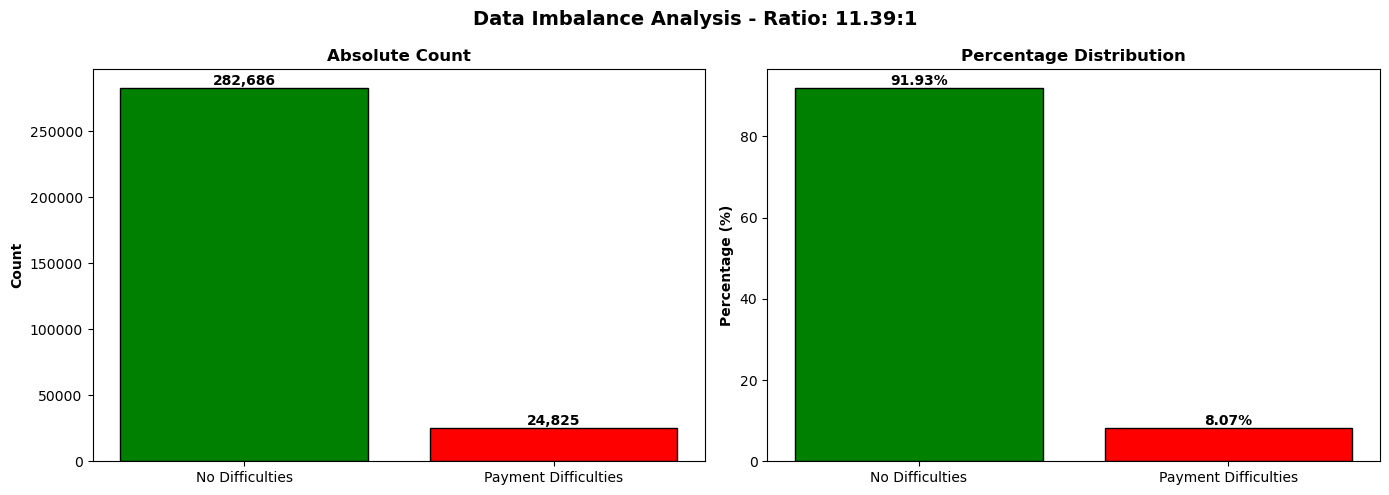

In [26]:
# Calculate imbalance
print("DATA IMBALANCE ANALYSIS:")
print("=" * 80)

target_counts = app_data_clean['TARGET'].value_counts()
imbalance_ratio = target_counts[0] / target_counts[1]

print(f"Class 0 (No Difficulties): {target_counts[0]:,}")
print(f"Class 1 (Payment Difficulties): {target_counts[1]:,}")
print(f"Imbalance Ratio: {imbalance_ratio:.2f}:1")
print("=" * 80)

if imbalance_ratio > 10:
    print(" SEVERE IMBALANCE DETECTED!")
elif imbalance_ratio > 3:
    print(" MODERATE IMBALANCE DETECTED!")
else:
    print("Data is relatively balanced")

# Visualize
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Count plot
axes[0].bar(['No Difficulties', 'Payment Difficulties'], target_counts.values,
           color=['green', 'red'], edgecolor='black')
axes[0].set_ylabel('Count', fontweight='bold')
axes[0].set_title('Absolute Count', fontsize=12, fontweight='bold')
for i, v in enumerate(target_counts.values):
    axes[0].text(i, v, f'{v:,}', ha='center', va='bottom', fontweight='bold')

# Percentage plot
percentages = (target_counts.values / target_counts.sum()) * 100
axes[1].bar(['No Difficulties', 'Payment Difficulties'], percentages,
           color=['green', 'red'], edgecolor='black')
axes[1].set_ylabel('Percentage (%)', fontweight='bold')
axes[1].set_title('Percentage Distribution', fontsize=12, fontweight='bold')
for i, v in enumerate(percentages):
    axes[1].text(i, v, f'{v:.2f}%', ha='center', va='bottom', fontweight='bold')

plt.suptitle(f'Data Imbalance Analysis - Ratio: {imbalance_ratio:.2f}:1', 
             fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

In [27]:
# Separate data by TARGET for analysis
payment_difficulties = app_data_clean[app_data_clean['TARGET'] == 1].copy()
no_difficulties = app_data_clean[app_data_clean['TARGET'] == 0].copy()

# Create derived variables
app_data_clean['AGE_YEARS'] = (-app_data_clean['DAYS_BIRTH'] / 365).round(0)
app_data_clean['EMPLOYMENT_YEARS'] = (-app_data_clean['DAYS_EMPLOYED'] / 365).round(1)

# Handle employment anomalies (>60 years is impossible)
median_employment = app_data_clean[app_data_clean['EMPLOYMENT_YEARS'] < 60]['EMPLOYMENT_YEARS'].median()
app_data_clean.loc[app_data_clean['EMPLOYMENT_YEARS'] > 60, 'EMPLOYMENT_YEARS'] = median_employment

# Update segmented dataframes
no_difficulties = app_data_clean[app_data_clean['TARGET'] == 0].copy()
payment_difficulties = app_data_clean[app_data_clean['TARGET'] == 1].copy()

print(" Data prepared for analysis")
print(f" Total records: {len(app_data_clean):,}")
print(f" No difficulties: {len(no_difficulties):,}")
print(f" Payment difficulties: {len(payment_difficulties):,}")

 Data prepared for analysis
 Total records: 307,511
 No difficulties: 282,686
 Payment difficulties: 24,825


## 7. Univariate Analysis

Analyzing individual variables to understand their distributions and relationship with payment difficulties.

**Key Variables to Analyze:**
- Numerical: Income, Credit Amount, Annuity, Age, Employment, Children
- Categorical: Contract Type, Gender, Income Type, Education, Family Status, Housing

In [28]:
# Function for numerical univariate analysis
def univariate_numerical_analysis(df, column, target_df0, target_df1, bins=50):
    """Analyze numerical variable by target"""
    
    fig, axes = plt.subplots(2, 2, figsize=(16, 10))
    
    # 1. Overall distribution
    axes[0, 0].hist(df[column].dropna(), bins=bins, color='skyblue', edgecolor='black', alpha=0.7)
    axes[0, 0].axvline(df[column].mean(), color='red', linestyle='--', linewidth=2, 
                       label=f'Mean: {df[column].mean():.2f}')
    axes[0, 0].axvline(df[column].median(), color='green', linestyle='--', linewidth=2, 
                       label=f'Median: {df[column].median():.2f}')
    axes[0, 0].set_title(f'{column} - Overall Distribution', fontsize=12, fontweight='bold')
    axes[0, 0].set_xlabel(column)
    axes[0, 0].set_ylabel('Frequency')
    axes[0, 0].legend()
    axes[0, 0].grid(alpha=0.3)
    
    # 2. Distribution by TARGET
    axes[0, 1].hist(target_df0[column].dropna(), bins=bins, alpha=0.6, label='No Difficulties', 
                    color='green', edgecolor='black')
    axes[0, 1].hist(target_df1[column].dropna(), bins=bins, alpha=0.6, label='Payment Difficulties', 
                    color='red', edgecolor='black')
    axes[0, 1].set_title(f'{column} - By Payment Status', fontsize=12, fontweight='bold')
    axes[0, 1].set_xlabel(column)
    axes[0, 1].set_ylabel('Frequency')
    axes[0, 1].legend()
    axes[0, 1].grid(alpha=0.3)
    
    # 3. Box plot
    data_to_plot = [target_df0[column].dropna(), target_df1[column].dropna()]
    bp = axes[1, 0].boxplot(data_to_plot, labels=['No Difficulties', 'Payment Difficulties'],
                            patch_artist=True)
    bp['boxes'][0].set_facecolor('lightgreen')
    bp['boxes'][1].set_facecolor('lightcoral')
    axes[1, 0].set_title(f'{column} - Box Plot Comparison', fontsize=12, fontweight='bold')
    axes[1, 0].set_ylabel(column)
    axes[1, 0].grid(axis='y', alpha=0.3)
    
    # 4. Statistical summary
    axes[1, 1].axis('off')
    stats_data = [
        ['Metric', 'No Difficulties', 'Payment Difficulties', 'Difference'],
        ['Mean', f"{target_df0[column].mean():.2f}", f"{target_df1[column].mean():.2f}", 
         f"{target_df1[column].mean() - target_df0[column].mean():.2f}"],
        ['Median', f"{target_df0[column].median():.2f}", f"{target_df1[column].median():.2f}",
         f"{target_df1[column].median() - target_df0[column].median():.2f}"],
        ['Std Dev', f"{target_df0[column].std():.2f}", f"{target_df1[column].std():.2f}", '-'],
    ]
    
    table = axes[1, 1].table(cellText=stats_data, cellLoc='center', loc='center')
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.scale(1, 2)
    
    for i in range(4):
        table[(0, i)].set_facecolor('#4CAF50')
        table[(0, i)].set_text_props(weight='bold', color='white')
    
    axes[1, 1].set_title(f'{column} - Statistical Comparison', fontsize=12, fontweight='bold', pad=20)
    
    plt.tight_layout()
    plt.show()
    
    print(f"{'='*80}")
    print(f"{column} - Key Statistics:")
    print(f"No Difficulties: Mean={target_df0[column].mean():.2f}, Median={target_df0[column].median():.2f}")
    print(f"Payment Difficulties: Mean={target_df1[column].mean():.2f}, Median={target_df1[column].median():.2f}")
    print(f"{'='*80}\n")

print(" Numerical univariate function defined")

 Numerical univariate function defined


In [29]:
# Function for categorical univariate analysis
def univariate_categorical_analysis(df, column, target_col='TARGET'):
    """Analyze categorical variable by target"""
    
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    
    # 1. Overall distribution
    value_counts = df[column].value_counts()
    axes[0].bar(range(len(value_counts)), value_counts.values, color='skyblue', edgecolor='black')
    axes[0].set_xticks(range(len(value_counts)))
    axes[0].set_xticklabels(value_counts.index, rotation=45, ha='right')
    axes[0].set_title(f'{column} - Overall Distribution', fontsize=12, fontweight='bold')
    axes[0].set_ylabel('Count')
    axes[0].grid(axis='y', alpha=0.3)
    
    # 2. Payment difficulty rate
    crosstab = pd.crosstab(df[column], df[target_col], normalize='index') * 100
    
    if 1 in crosstab.columns:
        difficulty_rate = crosstab[1].sort_values(ascending=False)
        colors = ['red' if x > difficulty_rate.mean() else 'green' for x in difficulty_rate.values]
        
        axes[1].bar(range(len(difficulty_rate)), difficulty_rate.values, color=colors, edgecolor='black')
        axes[1].set_xticks(range(len(difficulty_rate)))
        axes[1].set_xticklabels(difficulty_rate.index, rotation=45, ha='right')
        axes[1].set_title(f'{column} - Payment Difficulty Rate', fontsize=12, fontweight='bold')
        axes[1].set_ylabel('Difficulty Rate (%)')
        axes[1].axhline(y=difficulty_rate.mean(), color='blue', linestyle='--', 
                       label=f'Avg: {difficulty_rate.mean():.2f}%')
        axes[1].legend()
        axes[1].grid(axis='y', alpha=0.3)
        
        for i, v in enumerate(difficulty_rate.values):
            axes[1].text(i, v, f'{v:.1f}%', ha='center', va='bottom', fontsize=9)
    
    # 3. Stacked bar
    crosstab_counts = pd.crosstab(df[column], df[target_col])
    crosstab_counts.plot(kind='bar', stacked=True, ax=axes[2], color=['lightgreen', 'lightcoral'],
                        edgecolor='black')
    axes[2].set_title(f'{column} - Distribution by Status', fontsize=12, fontweight='bold')
    axes[2].set_ylabel('Count')
    axes[2].legend(['No Difficulties', 'Payment Difficulties'])
    axes[2].tick_params(axis='x', rotation=45)
    axes[2].grid(axis='y', alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    if 1 in crosstab.columns:
        print(f"{'='*80}")
        print(f"{column} - Payment Difficulty Rates:")
        print(difficulty_rate.sort_values(ascending=False))
        print(f"Average: {difficulty_rate.mean():.2f}%")
        print(f"{'='*80}\n")

print(" Categorical univariate function defined")

 Categorical univariate function defined


### NUMERICAL VARIABLES ANALYSIS ###


Analyzing: AMT_INCOME_TOTAL


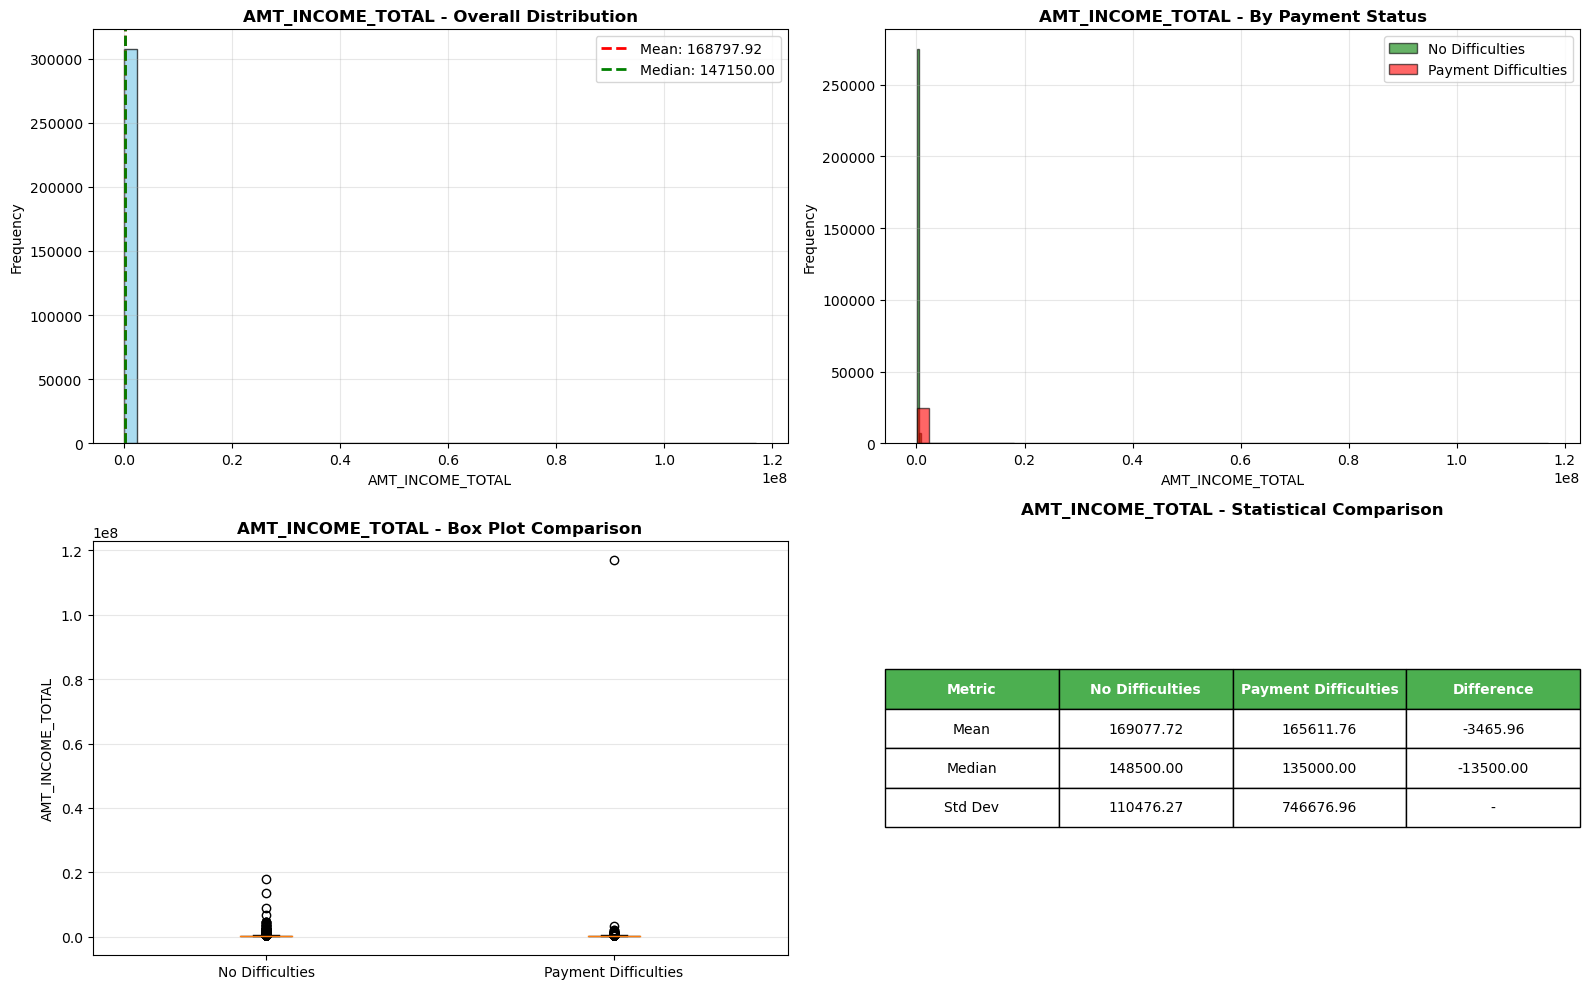

AMT_INCOME_TOTAL - Key Statistics:
No Difficulties: Mean=169077.72, Median=148500.00
Payment Difficulties: Mean=165611.76, Median=135000.00


Analyzing: AMT_CREDIT


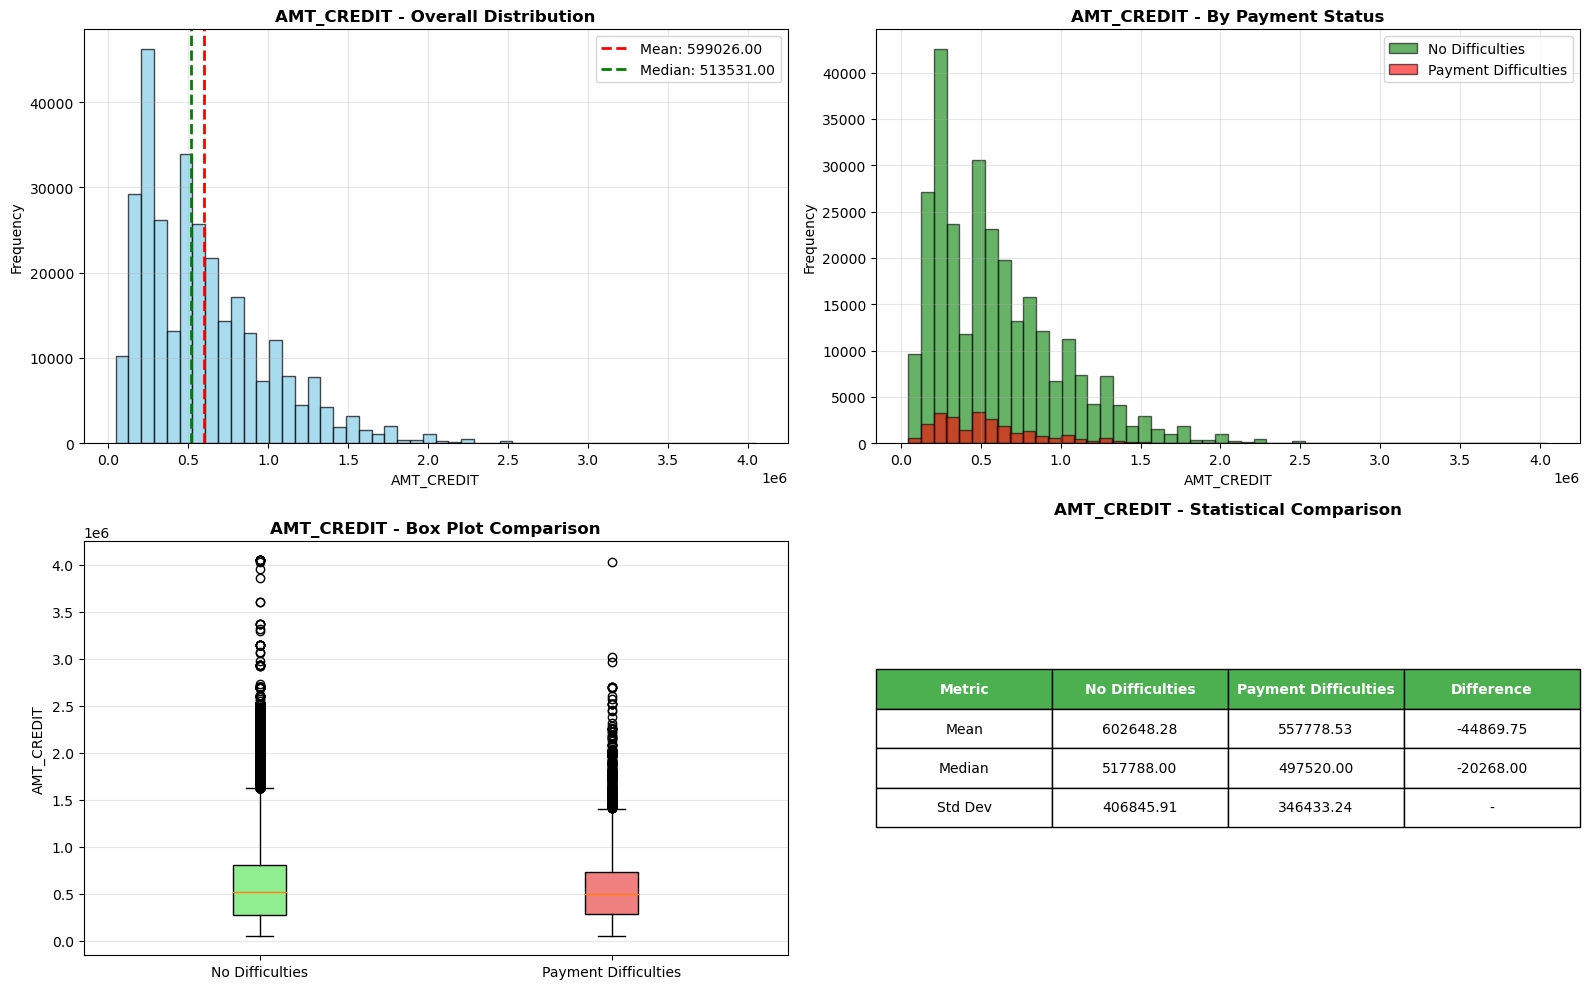

AMT_CREDIT - Key Statistics:
No Difficulties: Mean=602648.28, Median=517788.00
Payment Difficulties: Mean=557778.53, Median=497520.00


Analyzing: AMT_ANNUITY


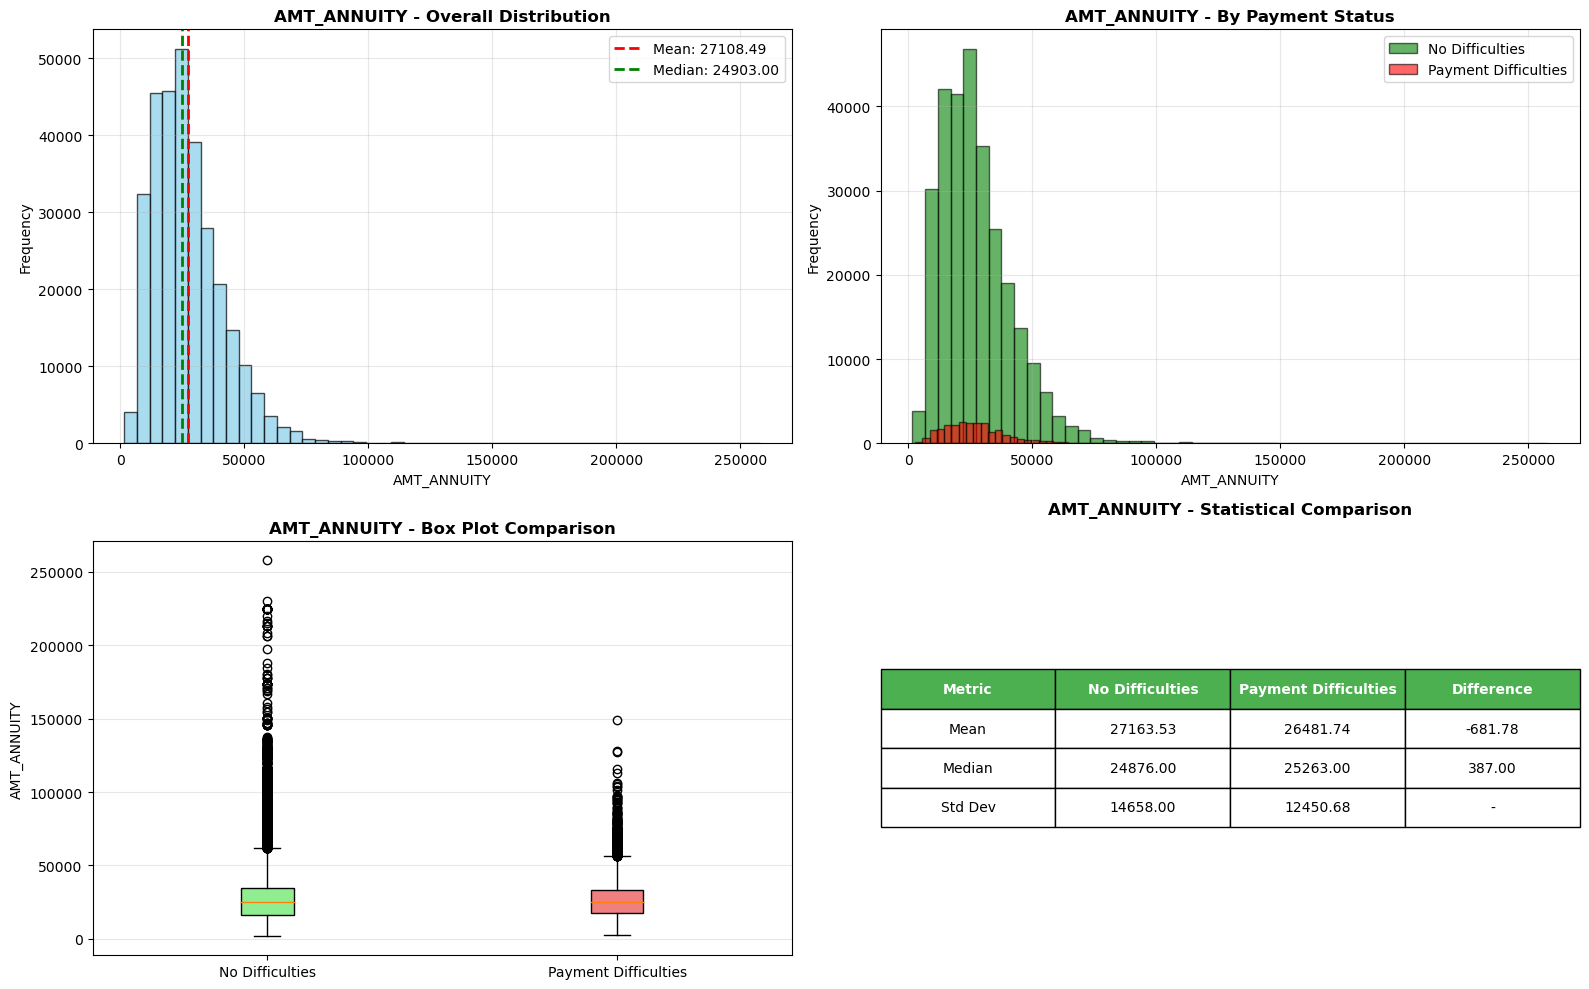

AMT_ANNUITY - Key Statistics:
No Difficulties: Mean=27163.53, Median=24876.00
Payment Difficulties: Mean=26481.74, Median=25263.00


Analyzing: AGE_YEARS


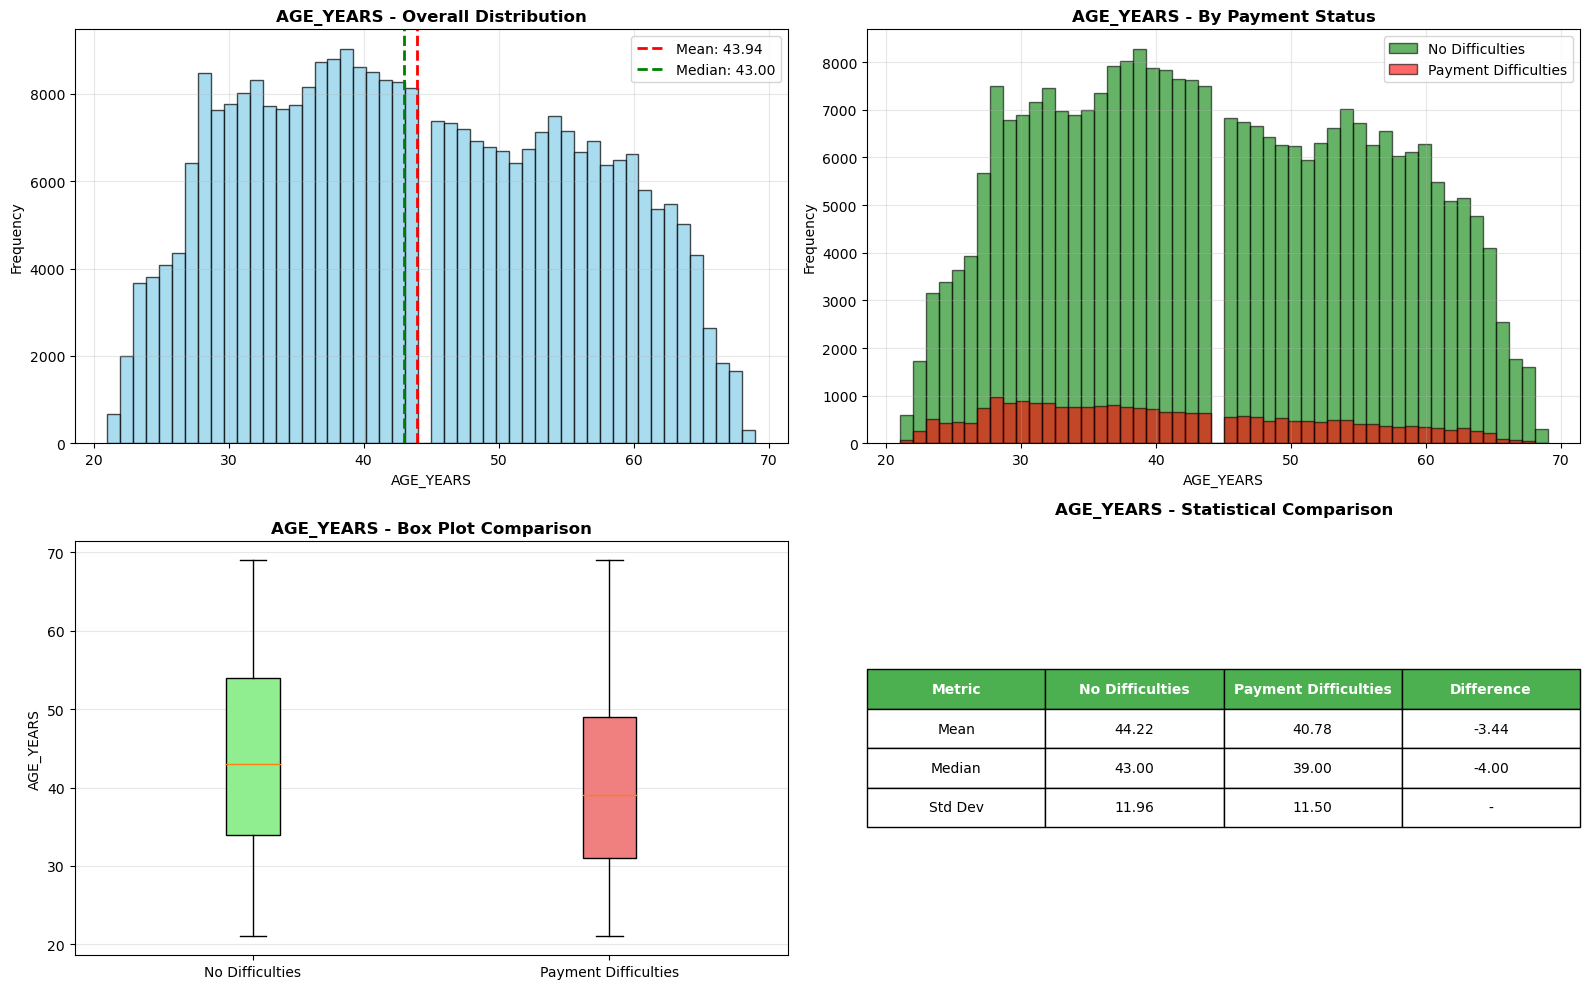

AGE_YEARS - Key Statistics:
No Difficulties: Mean=44.22, Median=43.00
Payment Difficulties: Mean=40.78, Median=39.00


Analyzing: EMPLOYMENT_YEARS


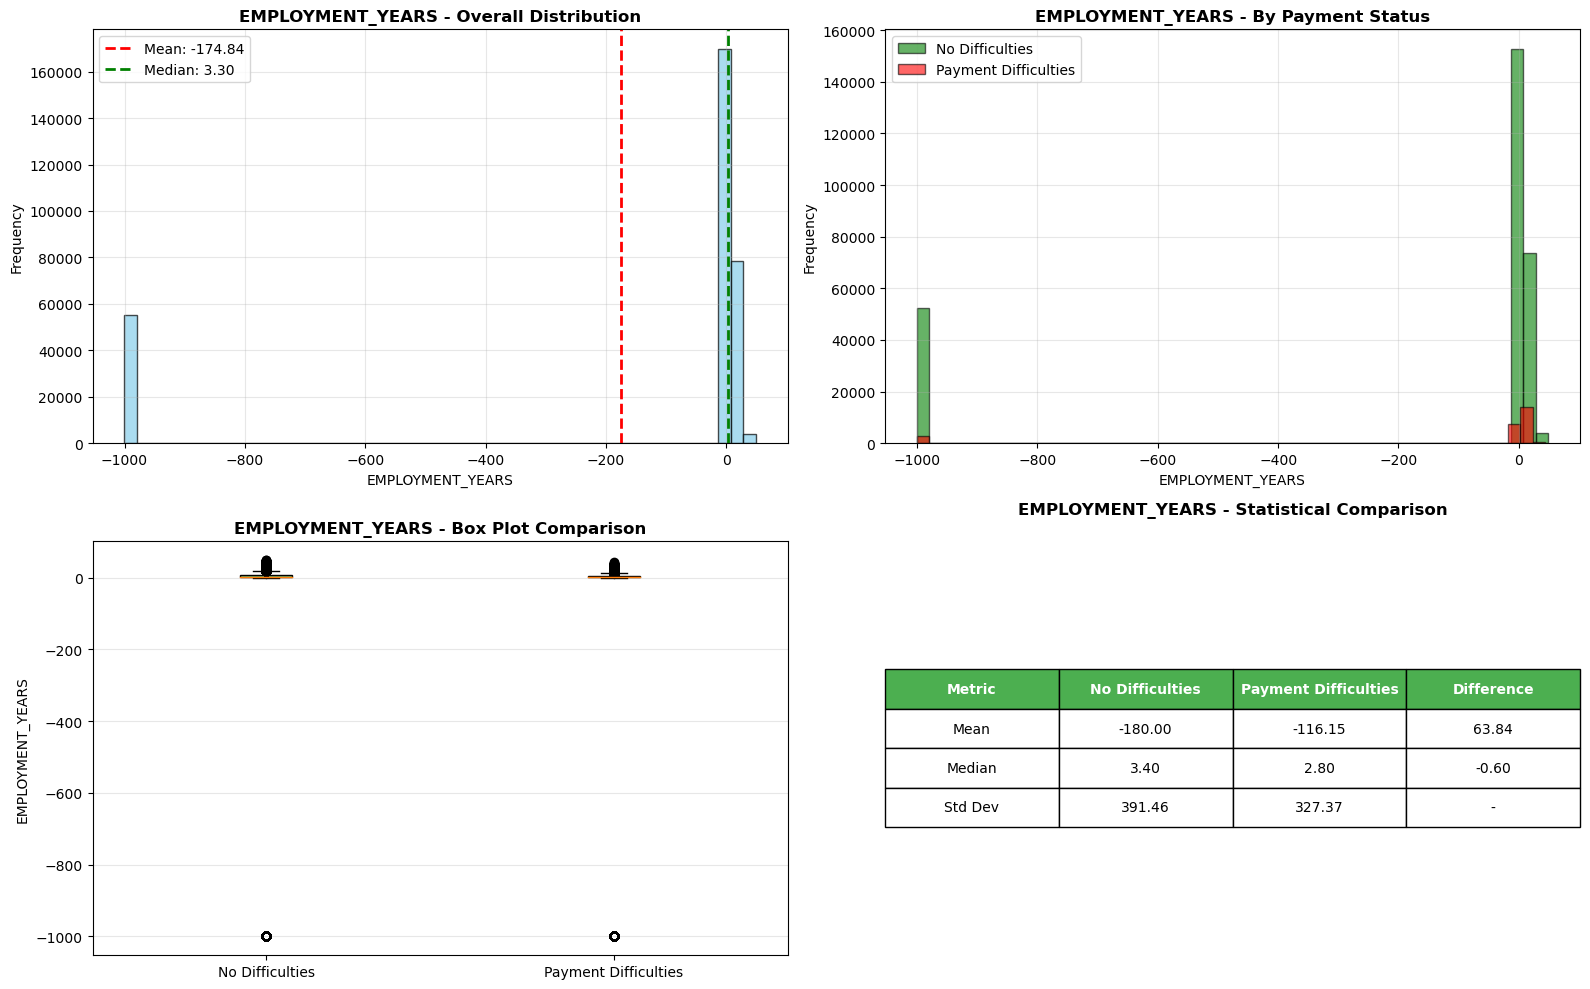

EMPLOYMENT_YEARS - Key Statistics:
No Difficulties: Mean=-180.00, Median=3.40
Payment Difficulties: Mean=-116.15, Median=2.80


Analyzing: CNT_CHILDREN


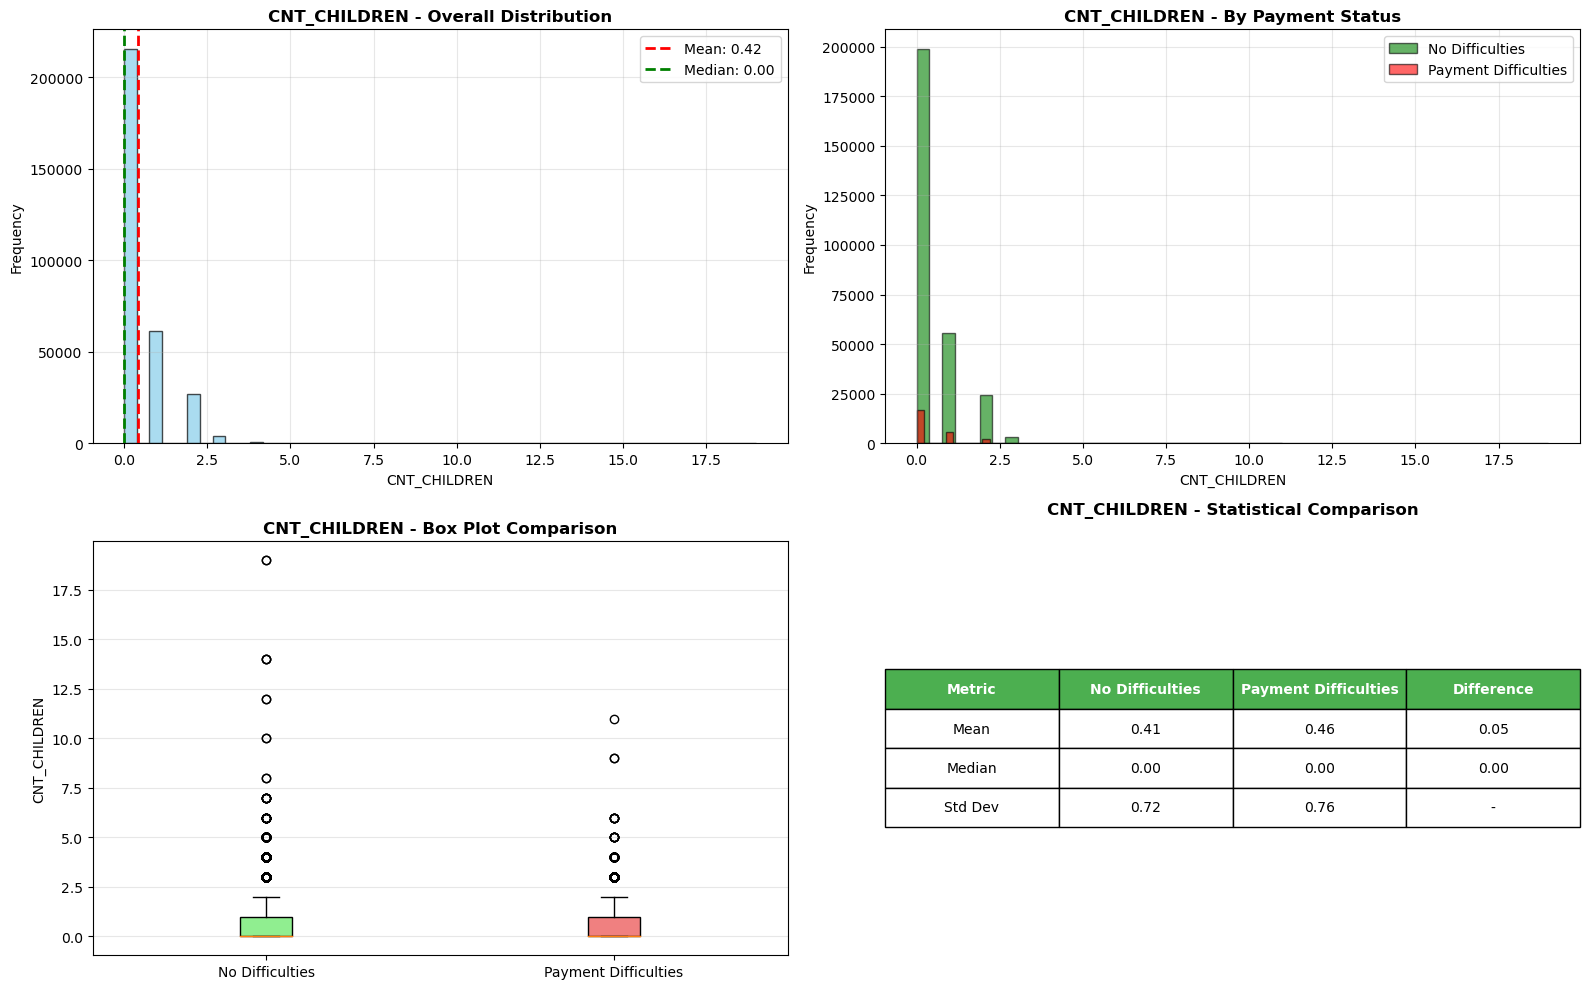

CNT_CHILDREN - Key Statistics:
No Difficulties: Mean=0.41, Median=0.00
Payment Difficulties: Mean=0.46, Median=0.00



In [30]:
# Analyze key numerical variables
key_numerical = ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 
                 'AGE_YEARS', 'EMPLOYMENT_YEARS', 'CNT_CHILDREN']

print("### NUMERICAL VARIABLES ANALYSIS ###\n")

for col in key_numerical:
    if col in app_data_clean.columns:
        print(f"\nAnalyzing: {col}")
        univariate_numerical_analysis(app_data_clean, col, 
                                       no_difficulties, payment_difficulties)

### CATEGORICAL VARIABLES ANALYSIS ###


Analyzing: NAME_CONTRACT_TYPE


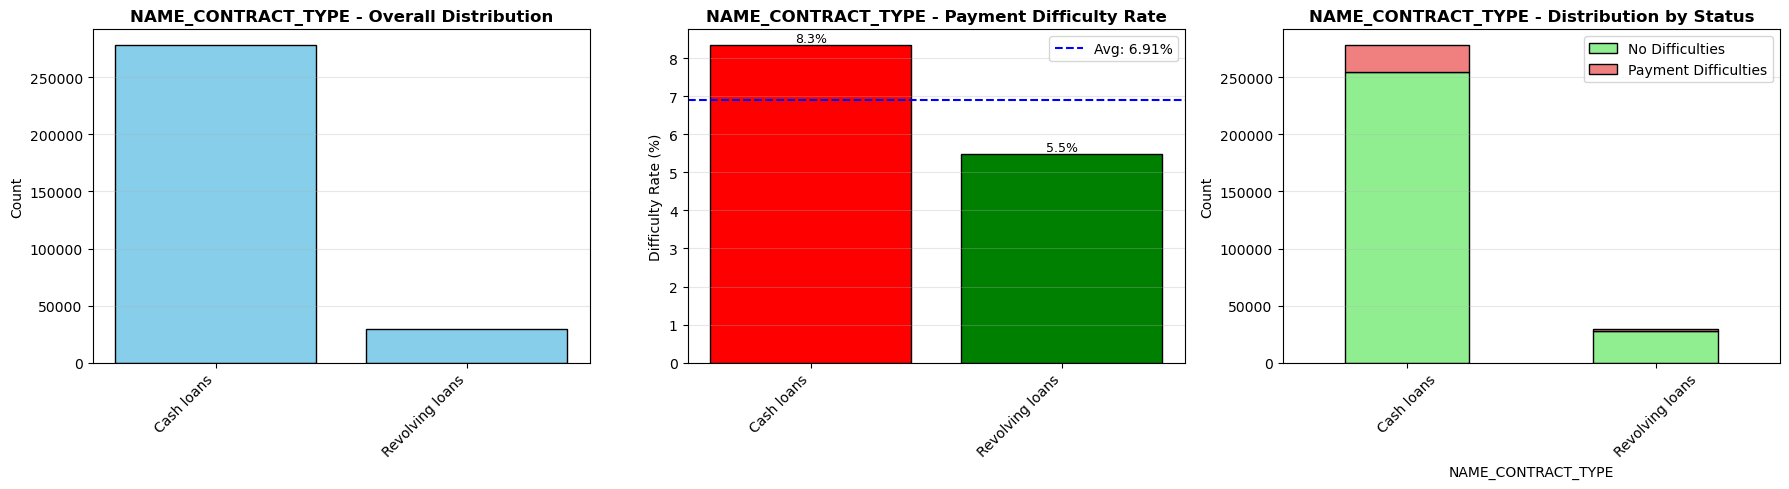

NAME_CONTRACT_TYPE - Payment Difficulty Rates:
NAME_CONTRACT_TYPE
Cash loans         8.345913
Revolving loans    5.478329
Name: 1, dtype: float64
Average: 6.91%


Analyzing: CODE_GENDER


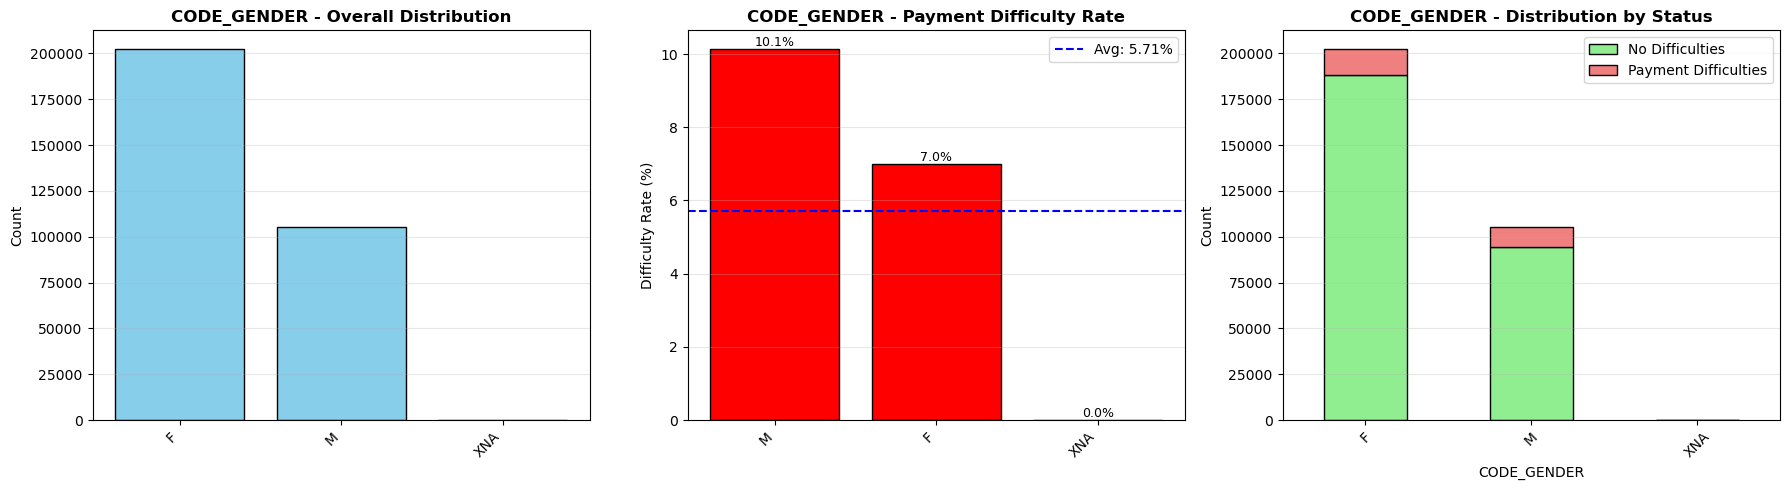

CODE_GENDER - Payment Difficulty Rates:
CODE_GENDER
M      10.141920
F       6.999328
XNA     0.000000
Name: 1, dtype: float64
Average: 5.71%


Analyzing: NAME_INCOME_TYPE


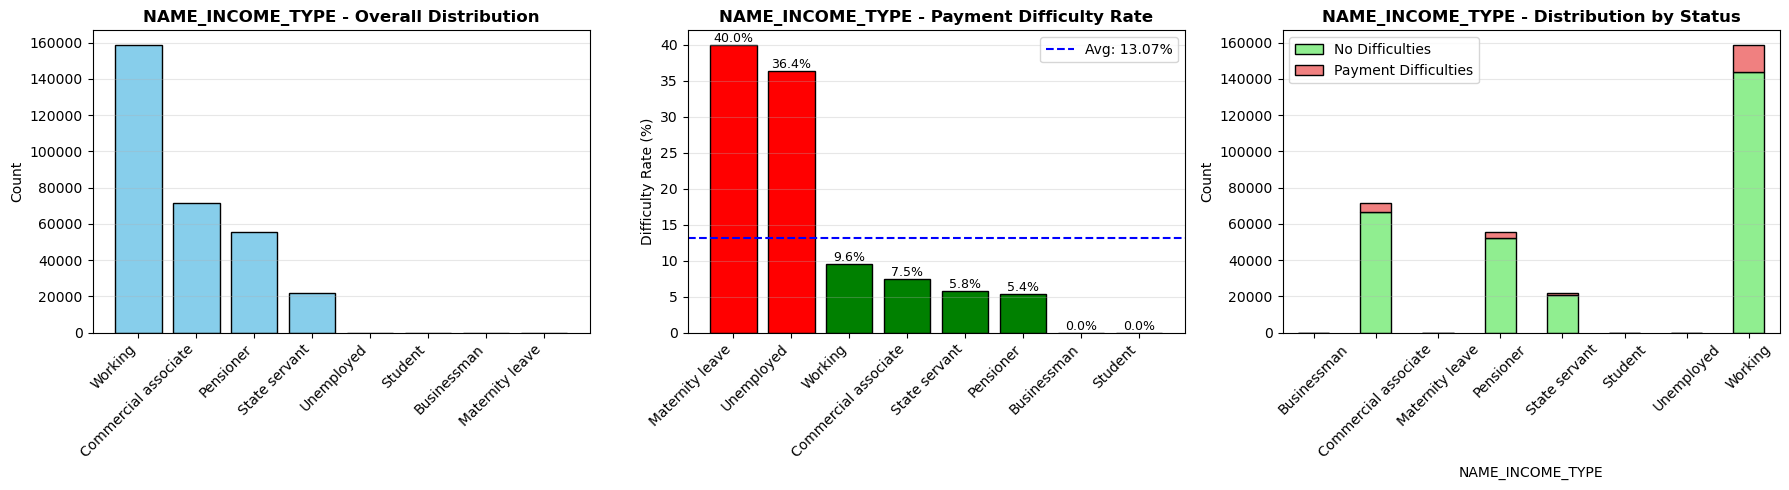

NAME_INCOME_TYPE - Payment Difficulty Rates:
NAME_INCOME_TYPE
Maternity leave         40.000000
Unemployed              36.363636
Working                  9.588472
Commercial associate     7.484257
State servant            5.754965
Pensioner                5.386366
Businessman              0.000000
Student                  0.000000
Name: 1, dtype: float64
Average: 13.07%


Analyzing: NAME_EDUCATION_TYPE


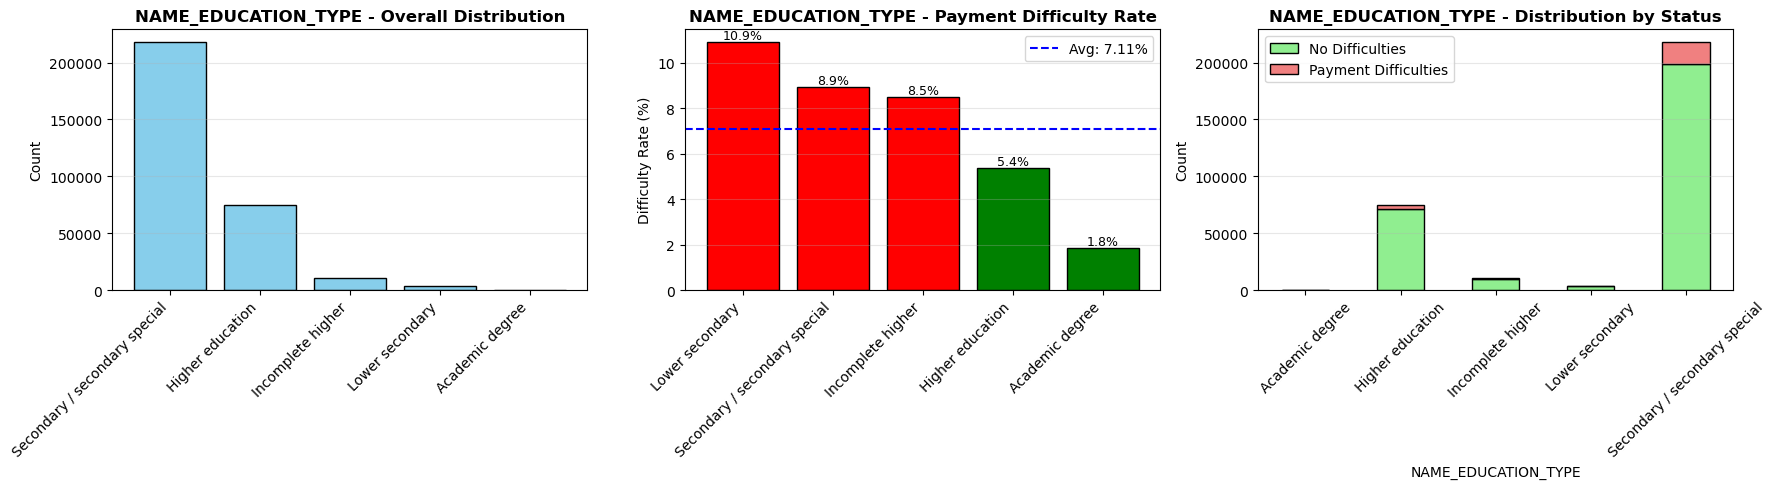

NAME_EDUCATION_TYPE - Payment Difficulty Rates:
NAME_EDUCATION_TYPE
Lower secondary                  10.927673
Secondary / secondary special     8.939929
Incomplete higher                 8.484966
Higher education                  5.355115
Academic degree                   1.829268
Name: 1, dtype: float64
Average: 7.11%


Analyzing: NAME_FAMILY_STATUS


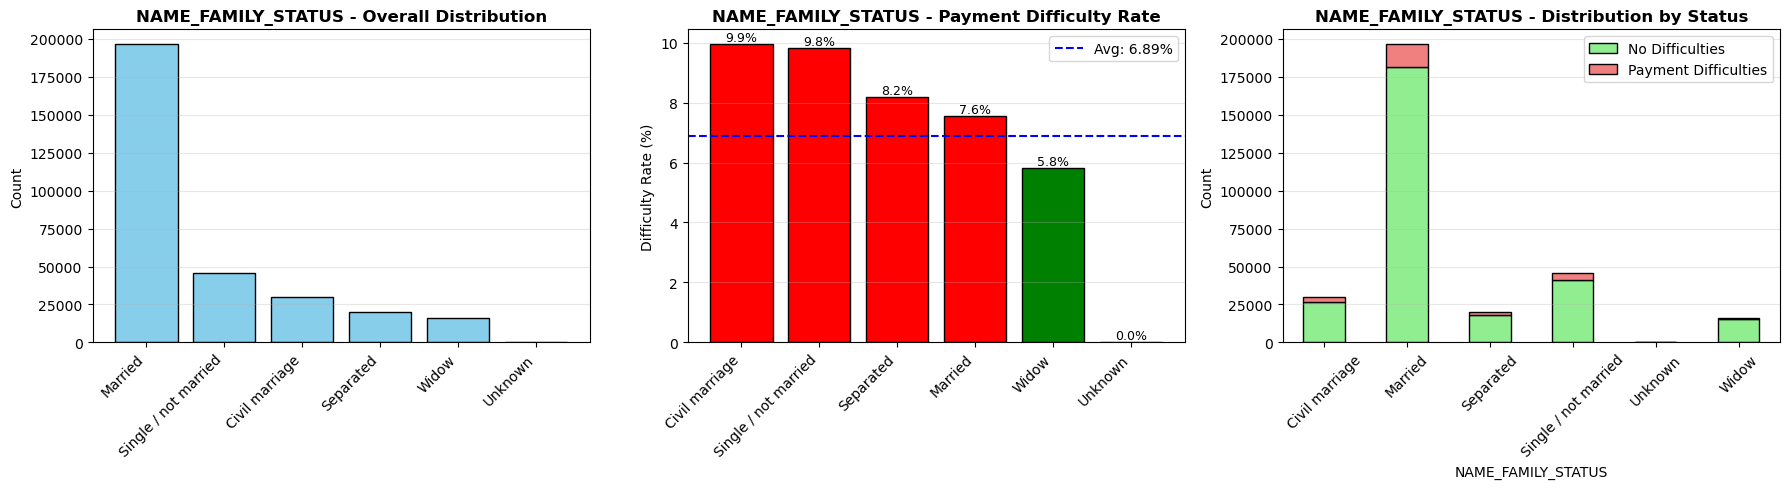

NAME_FAMILY_STATUS - Payment Difficulty Rates:
NAME_FAMILY_STATUS
Civil marriage          9.944584
Single / not married    9.807675
Separated               8.194234
Married                 7.559868
Widow                   5.824217
Unknown                 0.000000
Name: 1, dtype: float64
Average: 6.89%


Analyzing: NAME_HOUSING_TYPE


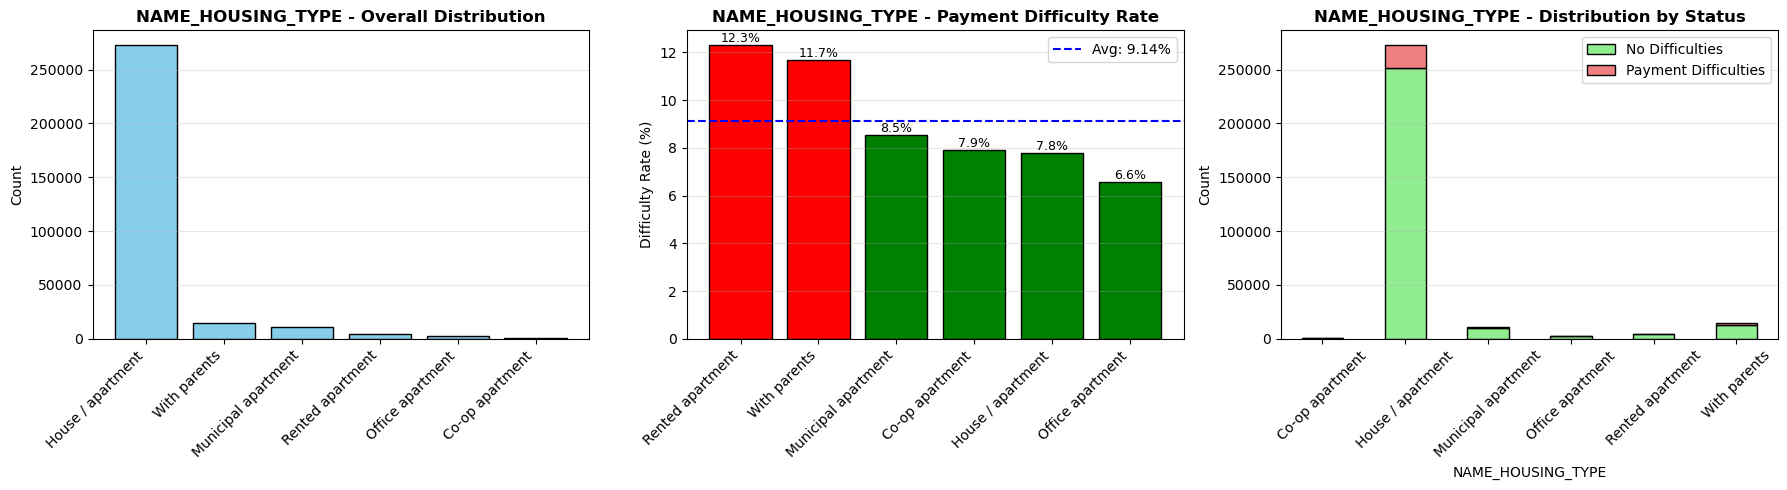

NAME_HOUSING_TYPE - Payment Difficulty Rates:
NAME_HOUSING_TYPE
Rented apartment       12.313051
With parents           11.698113
Municipal apartment     8.539748
Co-op apartment         7.932264
House / apartment       7.795711
Office apartment        6.572411
Name: 1, dtype: float64
Average: 9.14%



In [39]:
# Analyze key categorical variables
key_categorical = ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'NAME_INCOME_TYPE',
                   'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE']

print("### CATEGORICAL VARIABLES ANALYSIS ###\n")

for col in key_categorical:
    if col in app_data_clean.columns:
        print(f"\nAnalyzing: {col}")
        univariate_categorical_analysis(app_data_clean, col)

**Key Observations from Univariate Analysis:**

**Numerical Variables:**
1. **Income**: 27163.5 
2. **Credit Amount**: 602648.28 
3. **Age**: avg 44.2
4. **Employment Duration**: 180 months

**Categorical Variables:**
1. **Contract Type**: Cash loans 
2. **Income Type**: Maternity leave
3. **Education**: lower secondary
4. **Family Status**: single/not married



---

## 8. Bivariate Analysis

Analyzing relationships between variables, especially their correlation with payment difficulties.

CORRELATION ANALYSIS WITH TARGET:

Top 10 POSITIVE Correlations (Increase Risk):
FLAG_DOCUMENT_3                0.044346
REG_CITY_NOT_LIVE_CITY         0.044395
EMPLOYMENT_YEARS               0.044932
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_WORK_CITY         0.050994
DAYS_ID_PUBLISH                0.051457
DAYS_LAST_PHONE_CHANGE         0.055218
REGION_RATING_CLIENT           0.058899
REGION_RATING_CLIENT_W_CITY    0.060893
DAYS_BIRTH                     0.078239
Name: TARGET, dtype: float64

Top 10 NEGATIVE Correlations (Decrease Risk):
EXT_SOURCE_2                 -0.160295
EXT_SOURCE_3                 -0.155892
AGE_YEARS                    -0.078263
DAYS_EMPLOYED                -0.044932
AMT_GOODS_PRICE              -0.039623
FLOORSMAX_AVG                -0.039385
FLOORSMAX_MEDI               -0.039157
FLOORSMAX_MODE               -0.038377
REGION_POPULATION_RELATIVE   -0.037227
AMT_CREDIT                   -0.030369
Name: TARGET, dtype: float64


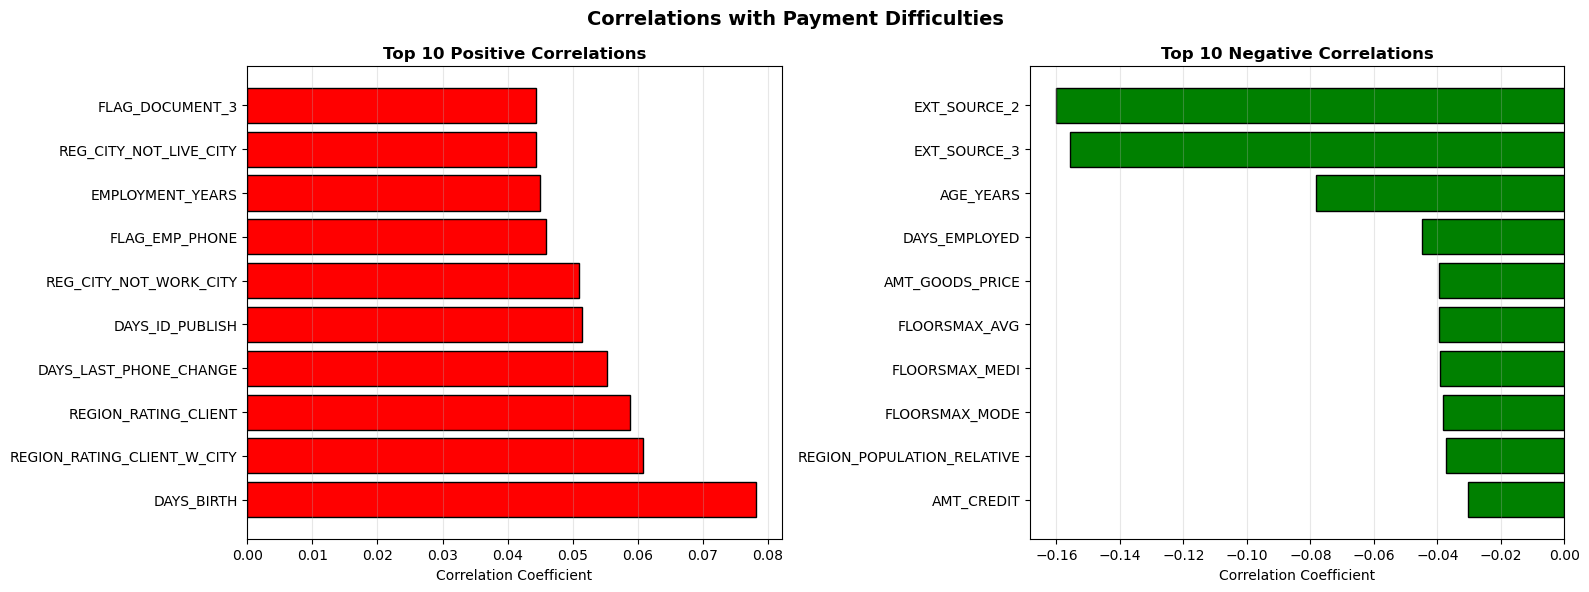

In [40]:
# Correlation analysis
print("CORRELATION ANALYSIS WITH TARGET:")
print("=" * 80)

numerical_cols = app_data_clean.select_dtypes(include=['int64', 'float64']).columns.tolist()
if 'SK_ID_CURR' in numerical_cols:
    numerical_cols.remove('SK_ID_CURR')

correlations = app_data_clean[numerical_cols].corr()['TARGET'].drop('TARGET').sort_values()

print("\nTop 10 POSITIVE Correlations (Increase Risk):")
print(correlations.tail(10))

print("\nTop 10 NEGATIVE Correlations (Decrease Risk):")
print(correlations.head(10))

# Visualize
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Positive
top_pos = correlations.tail(10)
axes[0].barh(range(len(top_pos)), top_pos.values, color='red', edgecolor='black')
axes[0].set_yticks(range(len(top_pos)))
axes[0].set_yticklabels(top_pos.index)
axes[0].set_title('Top 10 Positive Correlations', fontweight='bold', fontsize=12)
axes[0].set_xlabel('Correlation Coefficient')
axes[0].grid(axis='x', alpha=0.3)
axes[0].invert_yaxis()

# Negative
top_neg = correlations.head(10)
axes[1].barh(range(len(top_neg)), top_neg.values, color='green', edgecolor='black')
axes[1].set_yticks(range(len(top_neg)))
axes[1].set_yticklabels(top_neg.index)
axes[1].set_title('Top 10 Negative Correlations', fontweight='bold', fontsize=12)
axes[1].set_xlabel('Correlation Coefficient')
axes[1].grid(axis='x', alpha=0.3)
axes[1].invert_yaxis()

plt.suptitle('Correlations with Payment Difficulties', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

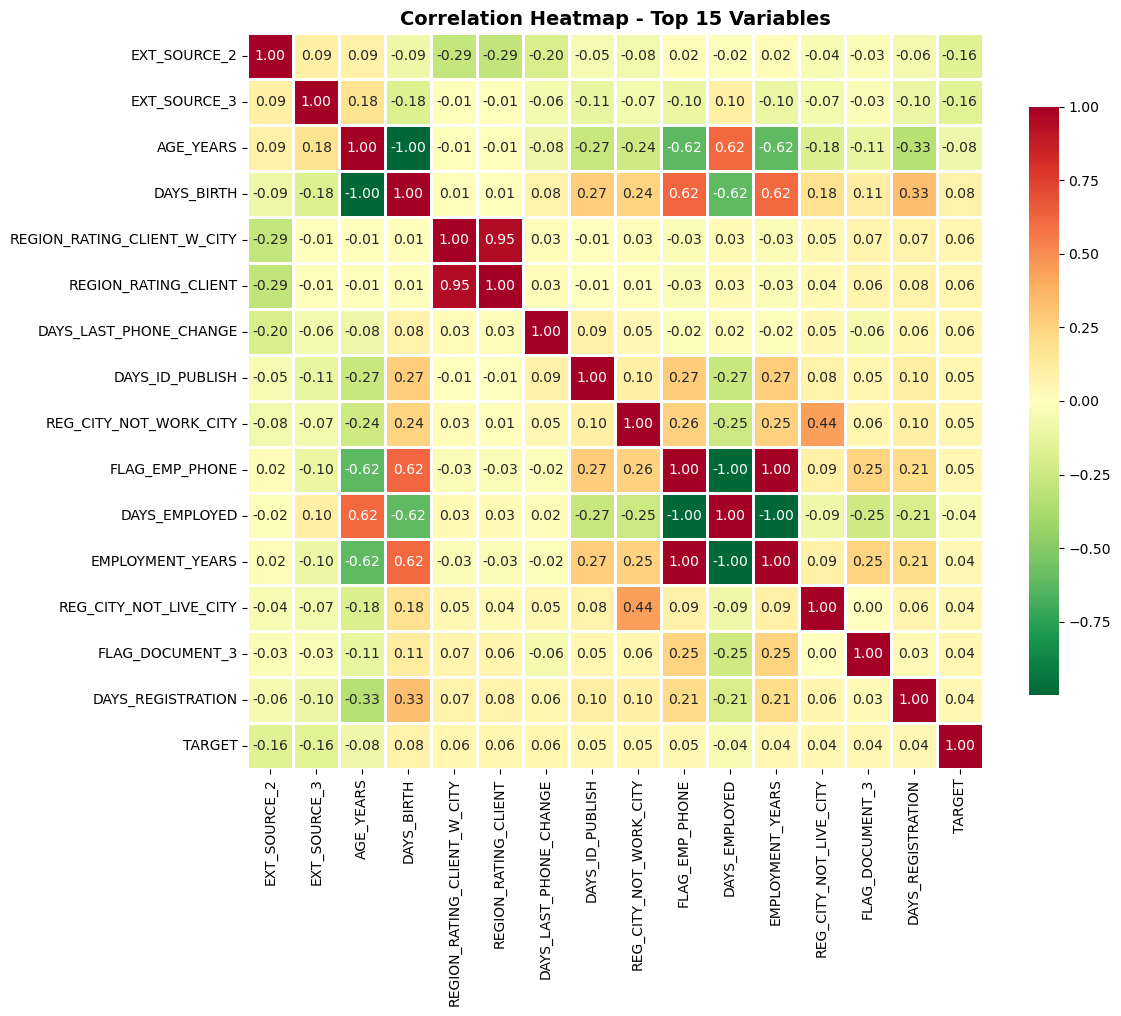

In [32]:
# Correlation heatmap
top_n = 15
top_vars = correlations.abs().sort_values(ascending=False).head(top_n).index.tolist()
top_vars.append('TARGET')

corr_matrix = app_data_clean[top_vars].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='RdYlGn_r', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title(f'Correlation Heatmap - Top {top_n} Variables', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

**Key Observations from Bivariate Analysis:**

**Variables that INCREASE risk** (positive correlation):
1. Days_Employed: +0.04 - Longer employment duration shows a tiny positive correlation, but the value is extremely small.
2. Employment_years: +0.04 - Very weak positive signal

**Variables that DECREASE risk** (negative correlation):
1. Age_years: -0.08 - Older clients are slightly less likely to default
2. Days_birth: -0.08 - Equivalent to age-larger number reduces risks


---

In [ ]:
## 9. Segmented Univariate Analysis

Analyzing how variable distributions differ across segments (e.g., Income by Education Level).

In [33]:
# Function for segmented univariate analysis
def segmented_univariate_analysis(df, numerical_col, categorical_col, target_col='TARGET'):
    """
    Analyze a numerical variable segmented by a categorical variable
    
    Parameters:
    df: DataFrame
    numerical_col: Numerical variable to analyze
    categorical_col: Categorical variable to segment by
    target_col: Target variable (default: 'TARGET')
    """
    
    # Get top 6 categories (for readability)
    categories = df[categorical_col].value_counts().head(6).index.tolist()
    
    # Create figure with 2 subplots
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    
    # 1. Box plots by segment and target
    data_for_boxplot = []
    labels_for_boxplot = []
    
    for cat in categories:
        # Data for no difficulties
        data_no_diff = df[(df[categorical_col] == cat) & (df[target_col] == 0)][numerical_col].dropna()
        if len(data_no_diff) > 0:
            data_for_boxplot.append(data_no_diff)
            labels_for_boxplot.append(f"{cat[:15]}\n(No)")
        
        # Data for with difficulties
        data_with_diff = df[(df[categorical_col] == cat) & (df[target_col] == 1)][numerical_col].dropna()
        if len(data_with_diff) > 0:
            data_for_boxplot.append(data_with_diff)
            labels_for_boxplot.append(f"{cat[:15]}\n(Yes)")
    
    # Create box plots
    bp = axes[0].boxplot(data_for_boxplot, labels=labels_for_boxplot, patch_artist=True)
    
    # Color boxes alternately (green for no difficulty, red for difficulty)
    for i, box in enumerate(bp['boxes']):
        if i % 2 == 0:
            box.set_facecolor('lightgreen')
        else:
            box.set_facecolor('lightcoral')
    
    axes[0].set_title(f'{numerical_col} by {categorical_col}', fontsize=12, fontweight='bold')
    axes[0].set_ylabel(numerical_col, fontweight='bold')
    axes[0].tick_params(axis='x', rotation=45, labelsize=8)
    axes[0].grid(axis='y', alpha=0.3)
    
    # 2. Mean comparison - grouped bar chart
    mean_data = df.groupby([categorical_col, target_col])[numerical_col].mean().unstack()
    mean_data = mean_data.loc[categories]
    
    x = np.arange(len(categories))
    width = 0.35
    
    if 0 in mean_data.columns and 1 in mean_data.columns:
        axes[1].bar(x - width/2, mean_data[0], width, label='No Difficulties', 
                   color='lightgreen', edgecolor='black')
        axes[1].bar(x + width/2, mean_data[1], width, label='Payment Difficulties', 
                   color='lightcoral', edgecolor='black')
        
        axes[1].set_xlabel(categorical_col, fontweight='bold')
        axes[1].set_ylabel(f'Mean {numerical_col}', fontweight='bold')
        axes[1].set_title(f'Mean {numerical_col} by {categorical_col}', fontsize=12, fontweight='bold')
        axes[1].set_xticks(x)
        axes[1].set_xticklabels([cat[:15] for cat in categories], rotation=45, ha='right')
        axes[1].legend()
        axes[1].grid(axis='y', alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Print summary statistics
    print(f"{'='*80}")
    print(f"Segmented Analysis: {numerical_col} by {categorical_col}")
    print(f"{'='*80}")
    for cat in categories:
        cat_data = df[df[categorical_col] == cat]
        no_diff_mean = cat_data[cat_data[target_col] == 0][numerical_col].mean()
        diff_mean = cat_data[cat_data[target_col] == 1][numerical_col].mean()
        diff_rate = cat_data[target_col].mean() * 100
        print(f"{cat}: No Diff Mean={no_diff_mean:.2f}, With Diff Mean={diff_mean:.2f}, Risk={diff_rate:.2f}%")
    print(f"{'='*80}\n")

print("Segmented analysis function defined")

Segmented analysis function defined


SEGMENTED UNIVARIATE ANALYSIS:

### Analyzing: AMT_INCOME_TOTAL by NAME_EDUCATION_TYPE ###



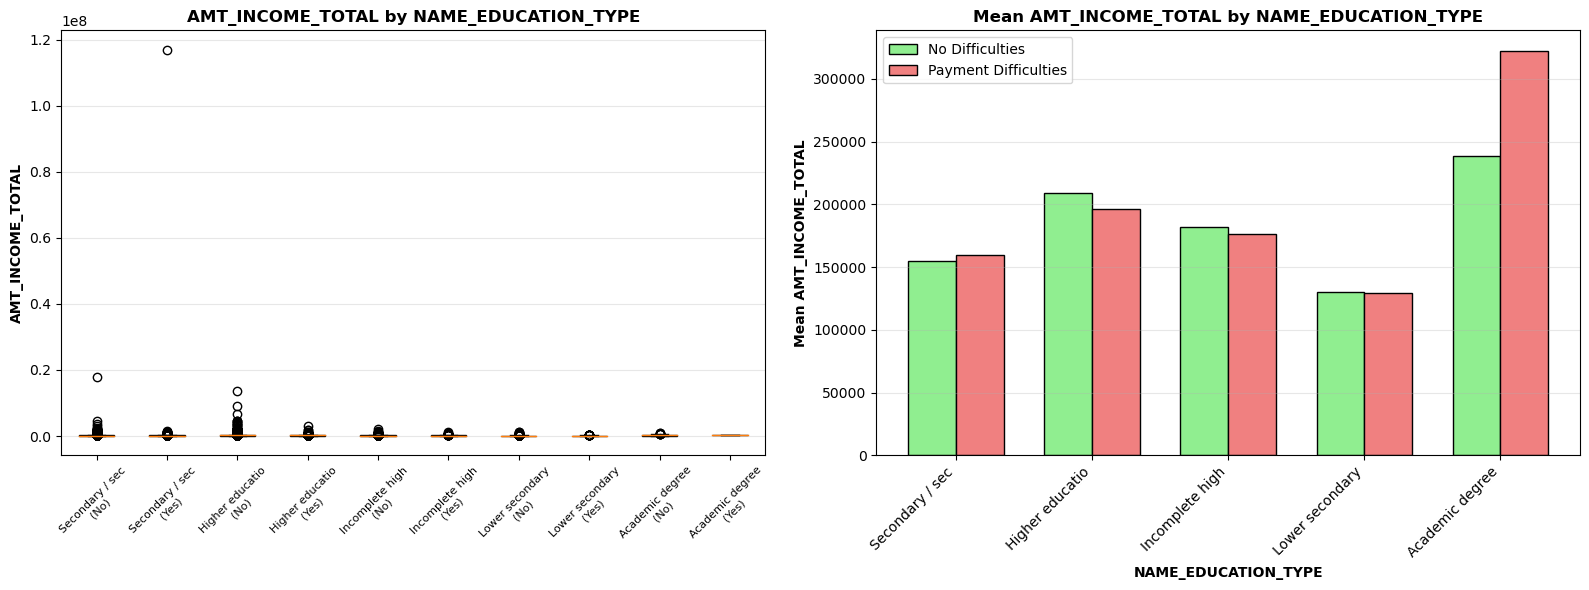

Segmented Analysis: AMT_INCOME_TOTAL by NAME_EDUCATION_TYPE
Secondary / secondary special: No Diff Mean=154722.70, With Diff Mean=159597.62, Risk=8.94%
Higher education: No Diff Mean=209354.91, With Diff Mean=196230.03, Risk=5.36%
Incomplete higher: No Diff Mean=182036.39, With Diff Mean=176466.84, Risk=8.48%
Lower secondary: No Diff Mean=130211.12, With Diff Mean=129005.40, Risk=10.93%
Academic degree: No Diff Mean=238472.05, With Diff Mean=322500.00, Risk=1.83%


### Analyzing: AMT_CREDIT by NAME_CONTRACT_TYPE ###



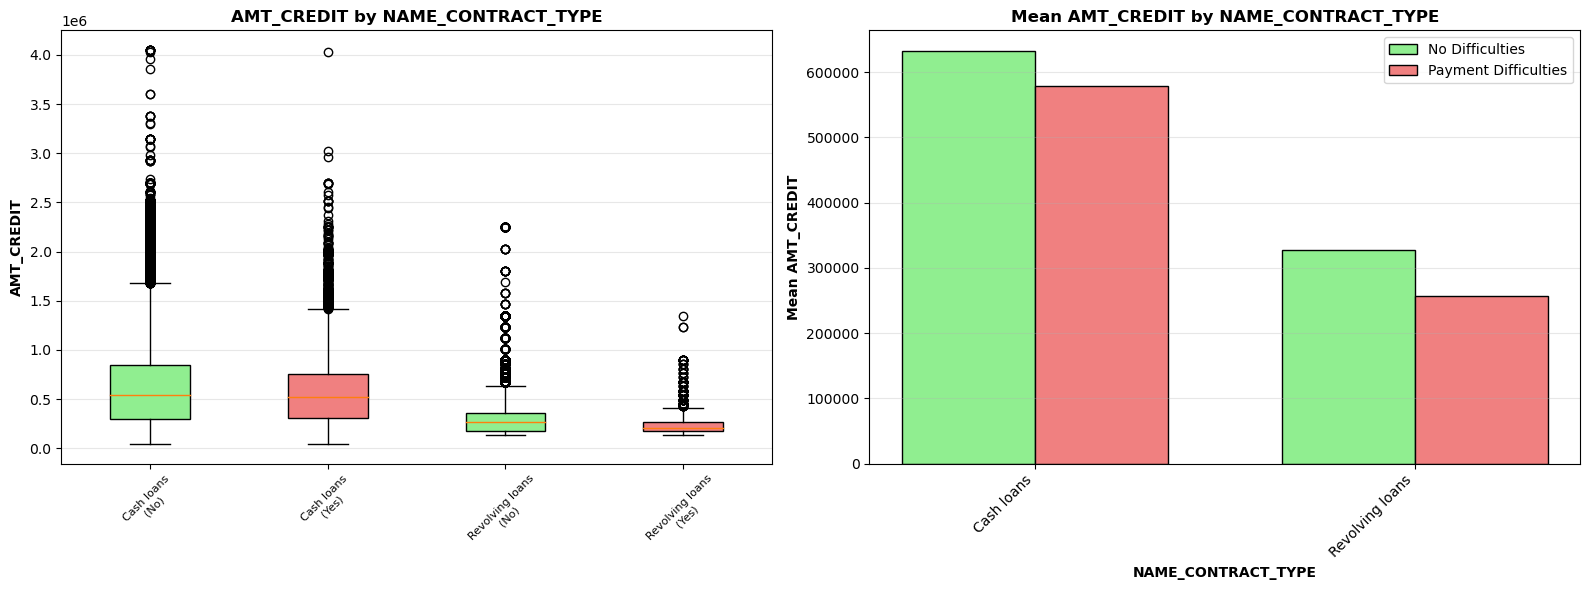

Segmented Analysis: AMT_CREDIT by NAME_CONTRACT_TYPE
Cash loans: No Diff Mean=632461.03, With Diff Mean=578598.77, Risk=8.35%
Revolving loans: No Diff Mean=327939.02, With Diff Mean=256365.34, Risk=5.48%


### Analyzing: AGE_YEARS by NAME_FAMILY_STATUS ###



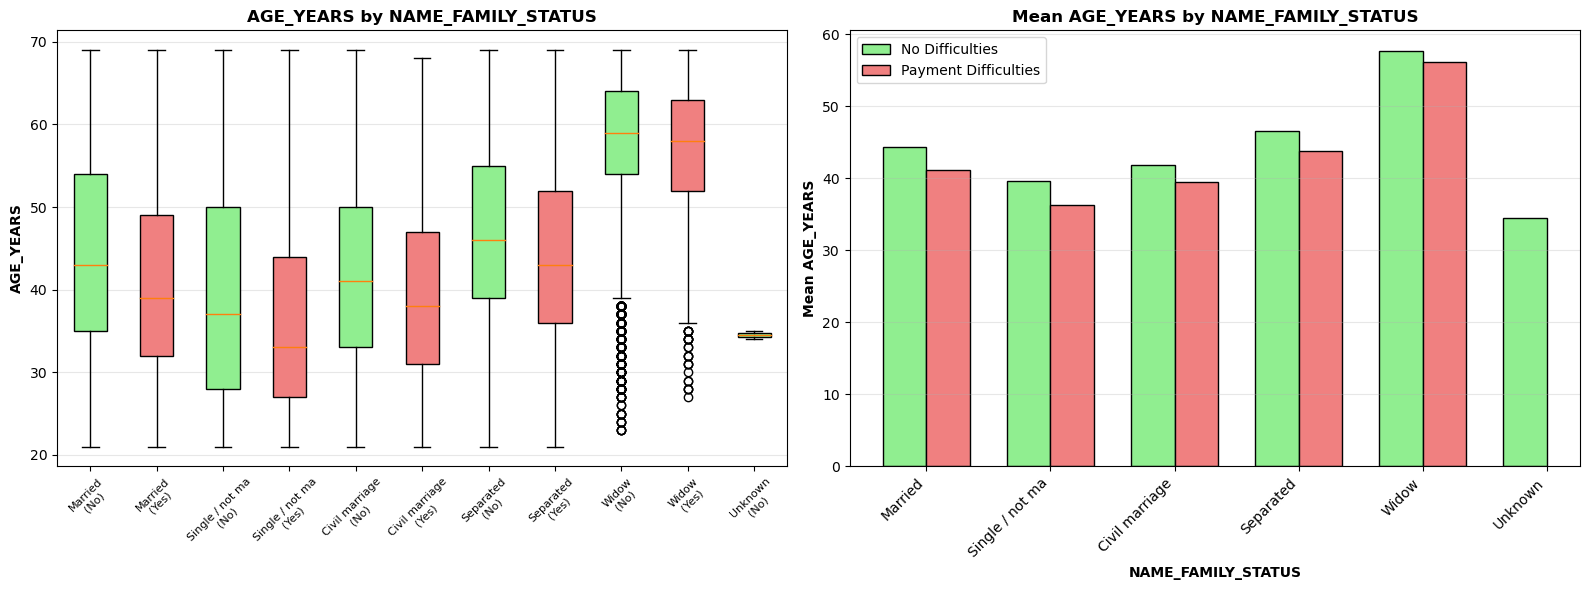

Segmented Analysis: AGE_YEARS by NAME_FAMILY_STATUS
Married: No Diff Mean=44.26, With Diff Mean=41.10, Risk=7.56%
Single / not married: No Diff Mean=39.60, With Diff Mean=36.28, Risk=9.81%
Civil marriage: No Diff Mean=41.77, With Diff Mean=39.44, Risk=9.94%
Separated: No Diff Mean=46.60, With Diff Mean=43.75, Risk=8.19%
Widow: No Diff Mean=57.64, With Diff Mean=56.19, Risk=5.82%
Unknown: No Diff Mean=34.50, With Diff Mean=nan, Risk=0.00%


### Analyzing: AMT_INCOME_TOTAL by OCCUPATION_TYPE ###



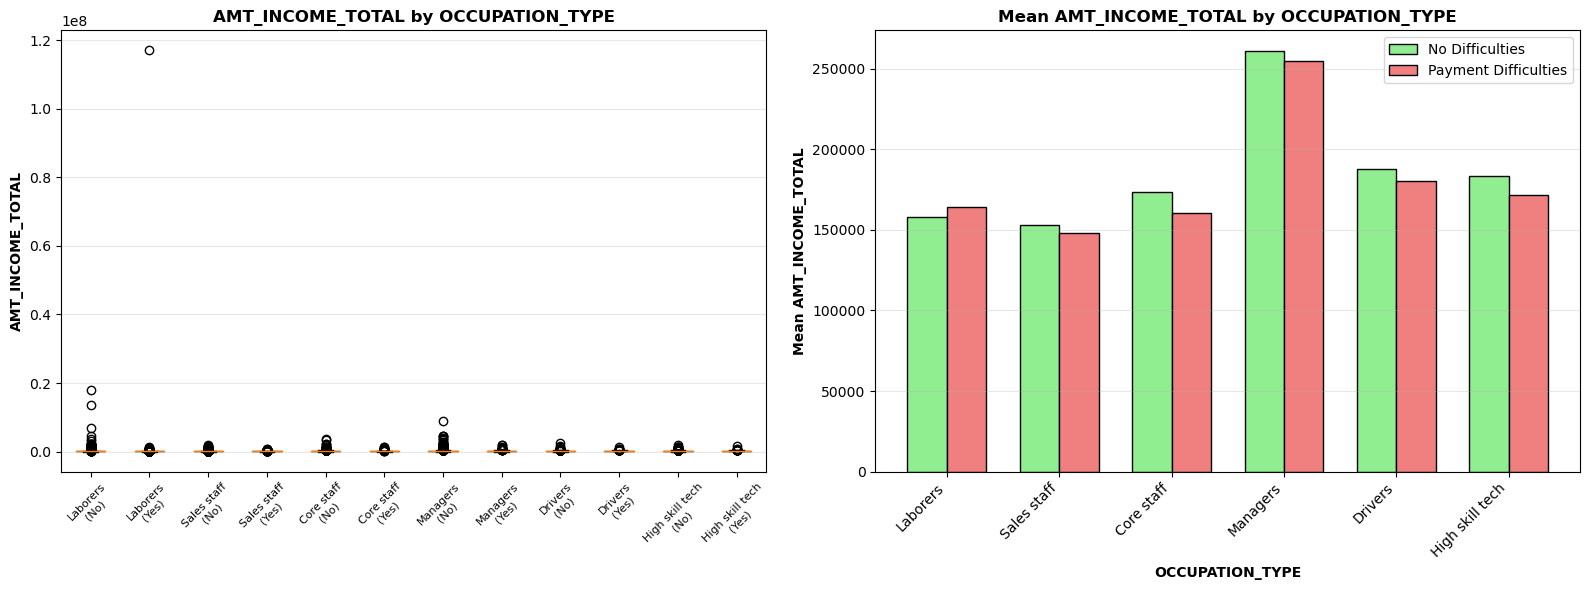

Segmented Analysis: AMT_INCOME_TOTAL by OCCUPATION_TYPE
Laborers: No Diff Mean=157668.28, With Diff Mean=164211.90, Risk=7.99%
Sales staff: No Diff Mean=152731.12, With Diff Mean=148284.92, Risk=9.63%
Core staff: No Diff Mean=173485.96, With Diff Mean=160331.31, Risk=6.30%
Managers: No Diff Mean=260714.52, With Diff Mean=254634.11, Risk=6.21%
Drivers: No Diff Mean=187871.25, With Diff Mean=180281.35, Risk=11.33%
High skill tech staff: No Diff Mean=183591.10, With Diff Mean=171431.04, Risk=6.16%


 All segmented analyses completed!


In [34]:
# Perform key segmented analyses
segmented_combinations = [
    ('AMT_INCOME_TOTAL', 'NAME_EDUCATION_TYPE'),
    ('AMT_CREDIT', 'NAME_CONTRACT_TYPE'),
    ('AGE_YEARS', 'NAME_FAMILY_STATUS'),
    ('AMT_INCOME_TOTAL', 'OCCUPATION_TYPE'),
]

print("SEGMENTED UNIVARIATE ANALYSIS:")
print("=" * 80)

for numerical, categorical in segmented_combinations:
    if numerical in app_data_clean.columns and categorical in app_data_clean.columns:
        print(f"\n### Analyzing: {numerical} by {categorical} ###\n")
        segmented_univariate_analysis(app_data_clean, numerical, categorical)
    else:
        print(f" Skipping: {numerical} or {categorical} not found in dataset")

print("\n All segmented analyses completed!")

**Key Observations from Segmented Analysis:**

1. **Income by Education**:
   - Academic degree 
   - "show lower risk even at lower income levels"

2. **Credit Amount by Contract Type**:
   - Cash loans
   - "show higher risk at high credit amounts"

3. **Age by Family Status**:
   - Unknown
   - "show lower risk across all age groups"

4. **Income by Occupation**:
   - Drivers
   - "show highest risk even with moderate income"


---

## 10. Top 10 Correlations by Segment (REQUIRED!)

**Objective**: Find top 10 correlations among variables for EACH segment separately:
- Clients WITH payment difficulties (TARGET=1)
- Clients WITHOUT payment difficulties (TARGET=0)

**Why This Matters**:
Different correlation patterns between segments reveal unique risk factors and protective factors.

**Method**:
1. Segment data by TARGET variable
2. Calculate correlation matrix for each segment
3. Extract top 10 variable pairs with highest absolute correlation
4. Compare patterns between segments
5. Identify actionable insights

In [35]:
# Function to get top N correlations from a correlation matrix
def get_top_correlations(df, n=10, exclude_cols=['TARGET', 'SK_ID_CURR']):
    """
    Get top N correlations from a DataFrame
    
    Parameters:
    df: DataFrame
    n: Number of top correlations to return (default: 10)
    exclude_cols: Columns to exclude from analysis
    
    Returns:
    DataFrame with top N correlations
    """
    
    # Select only numerical columns
    numerical_df = df.select_dtypes(include=['int64', 'float64'])
    
    # Remove excluded columns
    for col in exclude_cols:
        if col in numerical_df.columns:
            numerical_df = numerical_df.drop(columns=[col])
    
    # Calculate correlation matrix
    corr_matrix = numerical_df.corr()
    
    # Extract all correlation pairs (avoid duplicates by using upper triangle)
    corr_pairs = []
    for i in range(len(corr_matrix.columns)):
        for j in range(i+1, len(corr_matrix.columns)):
            corr_pairs.append({
                'Variable_1': corr_matrix.columns[i],
                'Variable_2': corr_matrix.columns[j],
                'Correlation': corr_matrix.iloc[i, j]
            })
    
    # Create DataFrame
    corr_df = pd.DataFrame(corr_pairs)
    
    # Sort by absolute correlation value
    corr_df['Abs_Correlation'] = corr_df['Correlation'].abs()
    corr_df = corr_df.sort_values('Abs_Correlation', ascending=False)
    
    # Return top N
    top_corr = corr_df.head(n)[['Variable_1', 'Variable_2', 'Correlation']].reset_index(drop=True)
    
    return top_corr

print(" Function to get top correlations defined successfully!")

 Function to get top correlations defined successfully!


In [36]:
# Get top 10 correlations for clients WITH payment difficulties
print("TOP 10 CORRELATIONS - CLIENTS WITH PAYMENT DIFFICULTIES (TARGET = 1):")
print("=" * 100)

top_corr_difficulties = get_top_correlations(payment_difficulties, n=10)

for idx, row in top_corr_difficulties.iterrows():
    print(f"{idx+1:2d}. {row['Variable_1']:<35} ↔ {row['Variable_2']:<35} | Correlation: {row['Correlation']:>7.4f}")

print("=" * 100)

# Display as DataFrame for better viewing
print("\nAs DataFrame:")
display(top_corr_difficulties)

TOP 10 CORRELATIONS - CLIENTS WITH PAYMENT DIFFICULTIES (TARGET = 1):
 1. DAYS_EMPLOYED                       ↔ EMPLOYMENT_YEARS                    | Correlation: -1.0000
 2. FLAG_EMP_PHONE                      ↔ EMPLOYMENT_YEARS                    | Correlation:  0.9997
 3. DAYS_EMPLOYED                       ↔ FLAG_EMP_PHONE                      | Correlation: -0.9997
 4. DAYS_BIRTH                          ↔ AGE_YEARS                           | Correlation: -0.9997
 5. OBS_30_CNT_SOCIAL_CIRCLE            ↔ OBS_60_CNT_SOCIAL_CIRCLE            | Correlation:  0.9983
 6. FLOORSMAX_AVG                       ↔ FLOORSMAX_MEDI                      | Correlation:  0.9973
 7. YEARS_BEGINEXPLUATATION_AVG         ↔ YEARS_BEGINEXPLUATATION_MEDI        | Correlation:  0.9961
 8. FLOORSMAX_MODE                      ↔ FLOORSMAX_MEDI                      | Correlation:  0.9895
 9. FLOORSMAX_AVG                       ↔ FLOORSMAX_MODE                      | Correlation:  0.9869
10. AMT_CREDIT       

,Variable_1,Variable_2,Correlation
0,DAYS_EMPLOYED,EMPLOYMENT_YEARS,-1.000000
1,FLAG_EMP_PHONE,EMPLOYMENT_YEARS,0.999702
2,DAYS_EMPLOYED,FLAG_EMP_PHONE,-0.999702
3,DAYS_BIRTH,AGE_YEARS,-0.999680
4,OBS_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,0.998270
5,FLOORSMAX_AVG,FLOORSMAX_MEDI,0.997295
6,YEARS_BEGINEXPLUATATION_AVG,YEARS_BEGINEXPLUATATION_MEDI,0.996139
7,FLOORSMAX_MODE,FLOORSMAX_MEDI,0.989472
8,FLOORSMAX_AVG,FLOORSMAX_MODE,0.986935
9,AMT_CREDIT,AMT_GOODS_PRICE,0.982783


In [37]:
# Get top 10 correlations for clients WITHOUT payment difficulties
print("TOP 10 CORRELATIONS - CLIENTS WITHOUT PAYMENT DIFFICULTIES (TARGET = 0):")
print("=" * 100)

top_corr_no_difficulties = get_top_correlations(no_difficulties, n=10)

for idx, row in top_corr_no_difficulties.iterrows():
    print(f"{idx+1:2d}. {row['Variable_1']:<35} ↔ {row['Variable_2']:<35} | Correlation: {row['Correlation']:>7.4f}")

print("=" * 100)

# Display as DataFrame
print("\nAs DataFrame:")
display(top_corr_no_difficulties)

TOP 10 CORRELATIONS - CLIENTS WITHOUT PAYMENT DIFFICULTIES (TARGET = 0):
 1. DAYS_EMPLOYED                       ↔ EMPLOYMENT_YEARS                    | Correlation: -1.0000
 2. FLAG_EMP_PHONE                      ↔ EMPLOYMENT_YEARS                    | Correlation:  0.9998
 3. DAYS_EMPLOYED                       ↔ FLAG_EMP_PHONE                      | Correlation: -0.9998
 4. DAYS_BIRTH                          ↔ AGE_YEARS                           | Correlation: -0.9997
 5. OBS_30_CNT_SOCIAL_CIRCLE            ↔ OBS_60_CNT_SOCIAL_CIRCLE            | Correlation:  0.9985
 6. FLOORSMAX_AVG                       ↔ FLOORSMAX_MEDI                      | Correlation:  0.9973
 7. YEARS_BEGINEXPLUATATION_AVG         ↔ YEARS_BEGINEXPLUATATION_MEDI        | Correlation:  0.9936
 8. FLOORSMAX_MODE                      ↔ FLOORSMAX_MEDI                      | Correlation:  0.9890
 9. AMT_CREDIT                          ↔ AMT_GOODS_PRICE                     | Correlation:  0.9870
10. FLOORSMAX_AVG 

,Variable_1,Variable_2,Correlation
0,DAYS_EMPLOYED,EMPLOYMENT_YEARS,-1.000000
1,FLAG_EMP_PHONE,EMPLOYMENT_YEARS,0.999758
2,DAYS_EMPLOYED,FLAG_EMP_PHONE,-0.999758
3,DAYS_BIRTH,AGE_YEARS,-0.999706
4,OBS_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,0.998510
5,FLOORSMAX_AVG,FLOORSMAX_MEDI,0.997253
6,YEARS_BEGINEXPLUATATION_AVG,YEARS_BEGINEXPLUATATION_MEDI,0.993594
7,FLOORSMAX_MODE,FLOORSMAX_MEDI,0.988955
8,AMT_CREDIT,AMT_GOODS_PRICE,0.987022
9,FLOORSMAX_AVG,FLOORSMAX_MODE,0.986569


In [38]:
# Compare the two segments side by side
print("\n" + "="*130)
print("SIDE-BY-SIDE COMPARISON OF TOP 10 CORRELATIONS:")
print("="*130)
print(f"{'Rank':<6}{'Payment Difficulties (TARGET=1)':<60}{'Corr':<10}{'No Difficulties (TARGET=0)':<60}{'Corr':<10}")
print("="*130)

for i in range(10):
    # Payment difficulties segment
    var1_diff = top_corr_difficulties.iloc[i]['Variable_1'][:25]
    var2_diff = top_corr_difficulties.iloc[i]['Variable_2'][:25]
    diff_pair = f"{var1_diff} ↔ {var2_diff}"
    diff_corr = top_corr_difficulties.iloc[i]['Correlation']
    
    # No difficulties segment
    var1_no = top_corr_no_difficulties.iloc[i]['Variable_1'][:25]
    var2_no = top_corr_no_difficulties.iloc[i]['Variable_2'][:25]
    no_diff_pair = f"{var1_no} ↔ {var2_no}"
    no_diff_corr = top_corr_no_difficulties.iloc[i]['Correlation']
    
    print(f"{i+1:<6}{diff_pair:<60}{diff_corr:<10.4f}{no_diff_pair:<60}{no_diff_corr:<10.4f}")

print("="*130)
print("\n Comparison completed!")


SIDE-BY-SIDE COMPARISON OF TOP 10 CORRELATIONS:
Rank  Payment Difficulties (TARGET=1)                             Corr      No Difficulties (TARGET=0)                                  Corr      
1     DAYS_EMPLOYED ↔ EMPLOYMENT_YEARS                            -1.0000   DAYS_EMPLOYED ↔ EMPLOYMENT_YEARS                            -1.0000   
2     FLAG_EMP_PHONE ↔ EMPLOYMENT_YEARS                           0.9997    FLAG_EMP_PHONE ↔ EMPLOYMENT_YEARS                           0.9998    
3     DAYS_EMPLOYED ↔ FLAG_EMP_PHONE                              -0.9997   DAYS_EMPLOYED ↔ FLAG_EMP_PHONE                              -0.9998   
4     DAYS_BIRTH ↔ AGE_YEARS                                      -0.9997   DAYS_BIRTH ↔ AGE_YEARS                                      -0.9997   
5     OBS_30_CNT_SOCIAL_CIRCLE ↔ OBS_60_CNT_SOCIAL_CIRCLE         0.9983    OBS_30_CNT_SOCIAL_CIRCLE ↔ OBS_60_CNT_SOCIAL_CIRCLE         0.9985    
6     FLOORSMAX_AVG ↔ FLOORSMAX_MEDI                              0.9

**Key Observations from Segmented Correlations:**

### **Analysis of Payment Difficulties Group (TARGET=1):**

**Top Correlations:**
1. Days_employed <->Employment_years: -1.0 - Perfect negative relationship
2. Days_birth<-> Age_years: -0.9 - Perfect transformation relation


**Patterns Observed:**
- Social circle metrics shows strong internal correlation

---

### **Analysis of No Difficulties Group (TARGET=0):**

**Top Correlations:**
1. Days_employed <->Employment_years: -1.0 - Perfect negative relationship
2. Days_birth<-> Age_years: -0.97 - Exact functional relationship

**Patterns Observed:**
- Housing condition variables remain strongly correlated across segments

---

### **Comparison Between Segments:**

**Similarities:**
- Top 4 correlations are identical in both segments (employment, age, employer phone).


**Differences:**
- Correlation strengths vary slightly (e.g., 0.9936 vs 0.9961 for YEARS_BEGINEXPLUATATION pairs).
- Payment difficulties group shows slightly higher correlations in social circle and some housing variables.

**Key Insights:**
- Risk Indicators (TARGET = 1 group)
  Social circle default indicators (OBS_30, OBS_60) behave more   tightly together → default risk may propagate socially.
- Protective Factors (TARGET = 0 group)
  Credit amount and goods price correlate more tightly → structured, predictable purchasing behavior.


---